In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import datetime as dt

In [2]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA',  'ADBE']

In [3]:
start_date=dt.date(2015,1,10)
end_date=dt.date.today()

In [4]:
for sk in tickers:
    globals()[sk]=yf.download(sk,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
company_l=[AAPL, MSFT, GOOGL, AMZN, TSLA, NVDA, ADBE]

In [6]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import numpy as np\nimport pandas as pd\nimport yfinance as yf\nimport matplotlib.pyplot as plt\nfrom sklearn.preprocessing import MinMaxScaler\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, LSTM, Dropout\nimport datetime as dt',
  "tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA',  'ADBE']",
  'start_date=dt.date(2015,1,10)\nend_date=dt.date.today()',
  'for sk in tickers:\n    globals()[sk]=yf.download(sk,start=start_date,end=end_date)',
  'company_l=[AAPL, MSFT, GOOGL, AMZN, TSLA, NVDA, ADBE]',
  'globals()'],
 '_oh': {},
 '_dh': [WindowsPath('e:/deep learning/Tempproject')],
 'In': ['',
  'import numpy as np\nimport pandas as pd\nimport yfinance as yf\n

In [7]:
AAPL

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-12   28.150000   28.157499   27.200001   27.312500   24.356127   
2015-01-13   27.857500   28.200001   27.227501   27.555000   24.572374   
2015-01-14   27.260000   27.622499   27.125000   27.450001   24.478739   
2015-01-15   27.500000   27.514999   26.665001   26.705000   23.814381   
2015-01-16   26.757500   26.895000   26.299999   26.497499   23.629341   
...                ...         ...         ...         ...         ...   
2024-09-16  216.539993  217.220001  213.919998  216.320007  216.320007   
2024-09-17  215.750000  216.899994  214.500000  216.789993  216.789993   
2024-09-18  217.550003  222.710007  217.539993  220.690002  220.690002   
2024-09-19  224.990005  229.820007  224.630005  228.869995  228.869995   
2024-09-20  229.970001  233.089996  227.619995  228.199997  228.199997   

               Volume  
Date                   
2015-01-12  198603200  
2015-01-13  268367600  
2015-01-14  195826400  
2015-01-15  240056000  
2015-01-16  314053200  
...               ...  
2024-09-16   59357400  
2024-09-17   45519300  
2024-09-18   59894900  
2024-09-19   66781300  
2024-09-20  318582200  

[2440 rows x 6 columns]

In [8]:
tickers

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'ADBE']

In [9]:
company_n=['Apple',"microsoft","google",'amazon',"Tesla","Nvida","Adobe"]

In [10]:
for company, company_name in zip(company_l,company_n):
    company['company']=company_name
    
df=pd.concat(company_l,axis=0)

In [11]:
df.head()

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                         
2015-01-12  28.1500  28.157499  27.200001  27.312500  24.356127  198603200   
2015-01-13  27.8575  28.200001  27.227501  27.555000  24.572374  268367600   
2015-01-14  27.2600  27.622499  27.125000  27.450001  24.478739  195826400   
2015-01-15  27.5000  27.514999  26.665001  26.705000  23.814381  240056000   
2015-01-16  26.7575  26.895000  26.299999  26.497499  23.629341  314053200   

           company  
Date                
2015-01-12   Apple  
2015-01-13   Apple  
2015-01-14   Apple  
2015-01-15   Apple  
2015-01-16   Apple

In [12]:
df['company'].nunique()

7

In [13]:
print(f'null values:',df.isnull().sum())
print(f'duplicates:',df.duplicated().sum())


null values: Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
company      0
dtype: int64
duplicates: 0


In [14]:
df.describe()

Open          High           Low         Close     Adj Close  \
count  17080.000000  17080.000000  17080.000000  17080.000000  17080.000000   
mean     127.941764    129.545435    126.263233    127.963245    126.856691   
std      131.280215    132.887158    129.545280    131.268980    131.209539   
min        0.481250      0.488250      0.473500      0.480000      0.460854   
25%       32.085001     32.378751     31.671874     32.097332     30.634257   
50%       87.252750     88.275002     86.182499     87.243248     86.376831   
75%      173.857506    175.603504    171.881378    173.789993    172.879112   
max      696.280029    699.539978    678.909973    688.369995    688.369995   

             Volume  
count  1.708000e+04  
mean   1.216957e+08  
std    1.827504e+08  
min    5.892000e+05  
25%    2.546522e+07  
50%    5.695540e+07  
75%    1.234871e+08  
max    3.692928e+09

In [15]:
AAPL.describe()

Open         High          Low        Close    Adj Close  \
count  2440.000000  2440.000000  2440.000000  2440.000000  2440.000000   
mean     92.481957    93.478284    91.546491    92.555974    90.520934   
std      61.671185    62.334908    61.050311    61.723345    62.184525   
min      22.500000    22.917500    22.367500    22.584999    20.720034   
25%      37.026249    37.310625    36.671875    37.153124    34.834347   
50%      61.866249    63.923750    60.897501    61.996250    60.212856   
75%     149.157505   150.924999   147.740002   149.497498   147.440014   
max     236.479996   237.229996   233.089996   234.820007   234.548523   

             Volume  
count  2.440000e+03  
mean   1.189257e+08  
std    6.802651e+07  
min    2.404830e+07  
25%    7.371390e+07  
50%    1.019542e+08  
75%    1.433835e+08  
max    6.488252e+08

In [16]:
company_n

['Apple', 'microsoft', 'google', 'amazon', 'Tesla', 'Nvida', 'Adobe']

In [17]:
tickers

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'ADBE']

In [18]:
MSFT.describe()

Open         High          Low        Close    Adj Close  \
count  2440.000000  2440.000000  2440.000000  2440.000000  2440.000000   
mean    181.156328   182.895611   179.330414   181.202311   175.712314   
std     117.650878   118.698610   116.492446   117.652681   118.629225   
min      40.340000    40.740002    39.720001    40.290001    34.760628   
25%      69.797503    70.242500    69.215000    69.947500    64.269859   
50%     144.614998   146.760002   143.095001   144.505005   138.023933   
75%     275.252510   278.012497   270.894989   274.922508   269.652611   
max     467.000000   468.350006   464.459991   467.559998   466.718781   

             Volume  
count  2.440000e+03  
mean   2.912253e+07  
std    1.341410e+07  
min    7.425600e+06  
25%    2.082922e+07  
50%    2.599100e+07  
75%    3.334640e+07  
max    1.691640e+08

In [19]:
GOOGL.describe()


Open         High          Low        Close    Adj Close  \
count  2440.000000  2440.000000  2440.000000  2440.000000  2440.000000   
mean     80.201839    81.055608    79.380056    80.238101    80.046512   
std      41.409642    41.876905    40.971591    41.424550    41.336427   
min      24.962000    25.014000    24.545500    24.853001    24.791613   
25%      47.156875    47.437126    46.800999    47.106627    46.990271   
50%      62.727001    63.400501    62.203501    62.876499    62.721191   
75%     115.819498   117.601377   114.423752   116.352499   116.065102   
max     190.309998   191.750000   189.029999   191.179993   190.926636   

             Volume  
count  2.440000e+03  
mean   3.538602e+07  
std    1.703706e+07  
min    9.312000e+06  
25%    2.508608e+07  
50%    3.109000e+07  
75%    4.011400e+07  
max    2.571620e+08

In [20]:
AMZN.describe()

Open         High          Low        Close    Adj Close  \
count  2440.000000  2440.000000  2440.000000  2440.000000  2440.000000   
mean     98.541463    99.667110    97.310875    98.513570    98.513570   
std      51.939819    52.545998    51.269480    51.900586    51.900586   
min      14.314000    14.539500    14.262500    14.347500    14.347500   
25%      48.050374    48.433624    47.729624    48.067501    48.067501   
50%      93.689999    94.713501    92.685001    93.553753    93.553753   
75%     150.496376   152.851368   147.690628   150.066620   150.066620   
max     200.089996   201.199997   199.050003   200.000000   200.000000   

             Volume  
count  2.440000e+03  
mean   7.729993e+07  
std    4.061052e+07  
min    1.762600e+07  
25%    5.160850e+07  
50%    6.638265e+07  
75%    9.080315e+07  
max    4.771220e+08

In [21]:
TSLA.describe()

Open         High          Low        Close    Adj Close  \
count  2440.000000  2440.000000  2440.000000  2440.000000  2440.000000   
mean    110.202782   112.627393   107.628490   110.178568   110.178568   
std     109.960938   112.410149   107.285728   109.868290   109.868290   
min       9.488000    10.331333     9.403333     9.578000     9.578000   
25%      17.045666    17.333332    16.772166    17.043667    17.043667   
50%      24.617001    25.080000    24.150667    24.445333    24.445333   
75%     215.140003   219.677505   209.465832   214.939999   214.939999   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  2.440000e+03  
mean   1.130301e+08  
std    7.481100e+07  
min    1.062000e+07  
25%    6.699008e+07  
50%    9.330705e+07  
75%    1.312088e+08  
max    9.140820e+08

In [22]:
NVDA.describe()

Open         High          Low        Close    Adj Close  \
count  2440.000000  2440.000000  2440.000000  2440.000000  2440.000000   
mean     17.551422    17.882014    17.194860    17.553834    17.524585   
std      26.096350    26.608154    25.502462    26.073023    26.078349   
min       0.481250     0.488250     0.473500     0.480000     0.460854   
25%       3.430750     3.520250     3.386250     3.454938     3.419736   
50%       6.299625     6.375625     6.214500     6.300625     6.244013   
75%      19.686500    20.031000    19.253250    19.671250    19.634075   
max     139.800003   140.759995   132.419998   135.580002   135.568405   

             Volume  
count  2.440000e+03  
mean   4.751719e+08  
std    2.536383e+08  
min    5.244800e+07  
25%    3.157052e+08  
50%    4.242310e+08  
75%    5.695462e+08  
max    3.692928e+09

In [23]:
ADBE.describe()

Open         High          Low        Close    Adj Close  \
count  2440.000000  2440.000000  2440.000000  2440.000000  2440.000000   
mean    315.456557   319.212024   311.451443   315.500353   315.500353   
std     175.886887   177.989333   173.586339   175.836612   175.836612   
min      69.879997    70.400002    68.980003    69.989998    69.989998   
25%     141.852497   143.027504   140.882496   141.425003   141.425003   
50%     295.485001   300.060013   290.264999   295.699997   295.699997   
75%     473.669998   478.912514   468.312492   474.180000   474.180000   
max     696.280029   699.539978   678.909973   688.369995   688.369995   

             Volume  
count  2.440000e+03  
mean   2.933714e+06  
std    1.699875e+06  
min    5.892000e+05  
25%    1.963225e+06  
50%    2.536100e+06  
75%    3.397425e+06  
max    2.784020e+07

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17080 entries, 2015-01-12 to 2024-09-20
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       17080 non-null  float64
 1   High       17080 non-null  float64
 2   Low        17080 non-null  float64
 3   Close      17080 non-null  float64
 4   Adj Close  17080 non-null  float64
 5   Volume     17080 non-null  int64  
 6   company    17080 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 1.0+ MB


In [25]:
df['company'].index

DatetimeIndex(['2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
               '2015-01-16', '2015-01-20', '2015-01-21', '2015-01-22',
               '2015-01-23', '2015-01-26',
               ...
               '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12',
               '2024-09-13', '2024-09-16', '2024-09-17', '2024-09-18',
               '2024-09-19', '2024-09-20'],
              dtype='datetime64[ns]', name='Date', length=17080, freq=None)

In [26]:
len(df)

17080

In [27]:
company_l

[                  Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2015-01-12   28.150000   28.157499   27.200001   27.312500   24.356127   
 2015-01-13   27.857500   28.200001   27.227501   27.555000   24.572374   
 2015-01-14   27.260000   27.622499   27.125000   27.450001   24.478739   
 2015-01-15   27.500000   27.514999   26.665001   26.705000   23.814381   
 2015-01-16   26.757500   26.895000   26.299999   26.497499   23.629341   
 ...                ...         ...         ...         ...         ...   
 2024-09-16  216.539993  217.220001  213.919998  216.320007  216.320007   
 2024-09-17  215.750000  216.899994  214.500000  216.789993  216.789993   
 2024-09-18  217.550003  222.710007  217.539993  220.690002  220.690002   
 2024-09-19  224.990005  229.820007  224.630005  228.869995  228.869995   
 2024-09-20  229.970001  233.089996  227.619995  228.199997  228.199997   
 
                Volume 

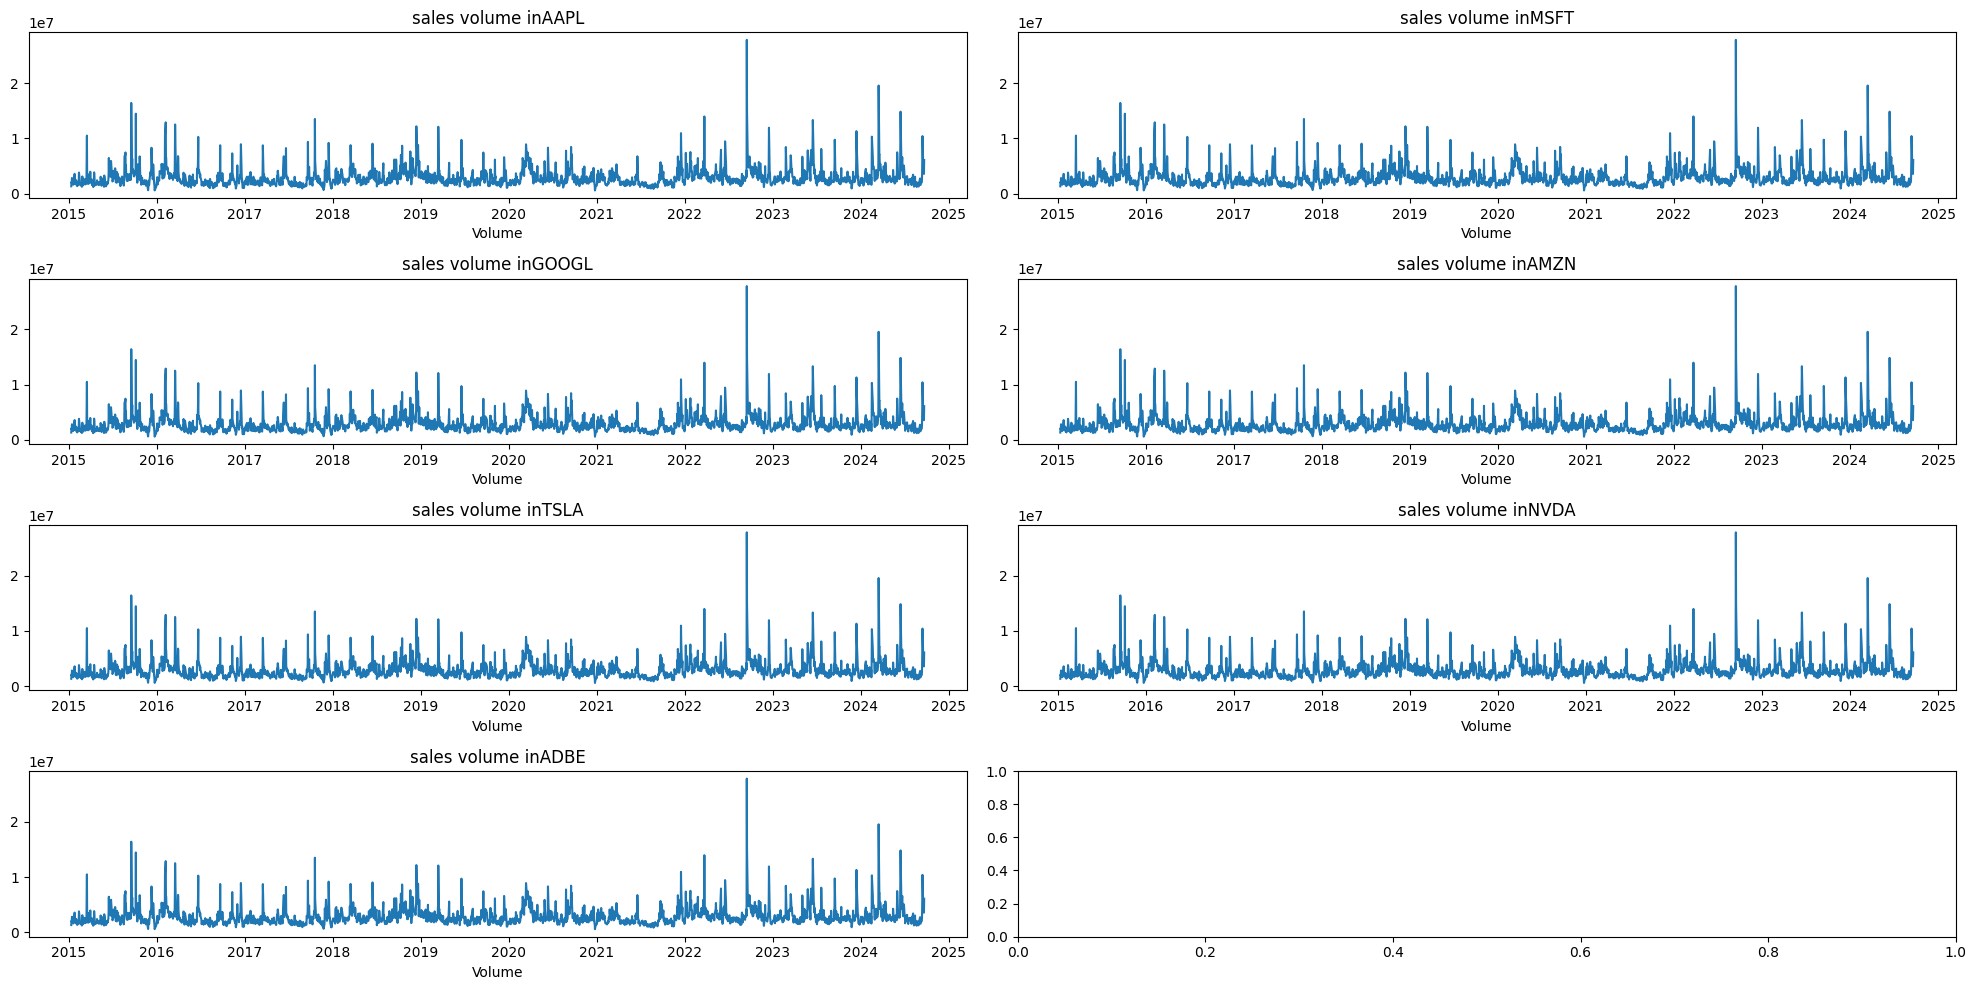

In [28]:

fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(20,10))
axes=axes.flatten()
for i,j in enumerate(company_l):
    
    axes[i].plot(company['Volume'])
    axes[i].set_xlabel('Volume')
    axes[i].set_ylabel(None)
    axes[i].set_title(f"sales volume in{ tickers[i]}")
plt.tight_layout()
plt.show()


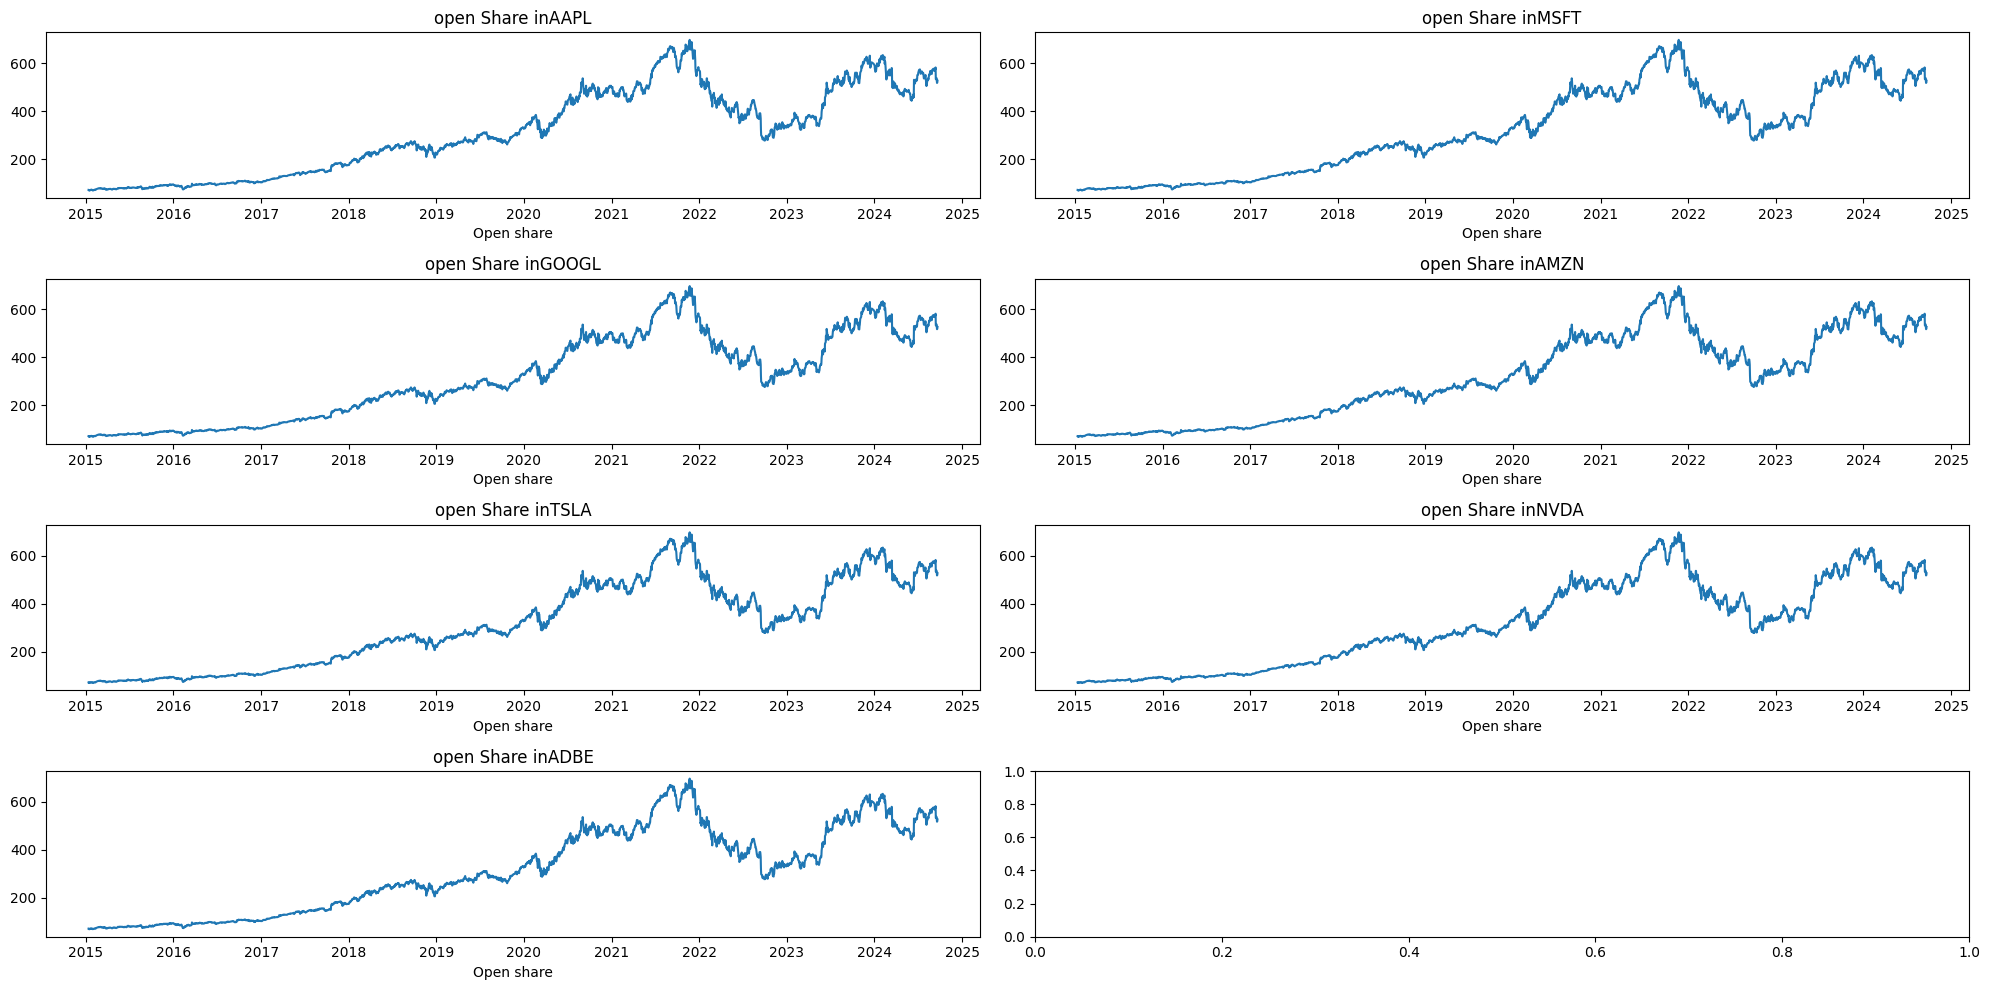

In [29]:

fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(20,10))
axes=axes.flatten()
for i,j in enumerate(company_l):
    
    axes[i].plot(company['Open'])
    axes[i].set_xlabel('Open share')
    axes[i].set_ylabel(None)
    axes[i].set_title(f"open Share in{ tickers[i]}")
plt.tight_layout()
plt.show()


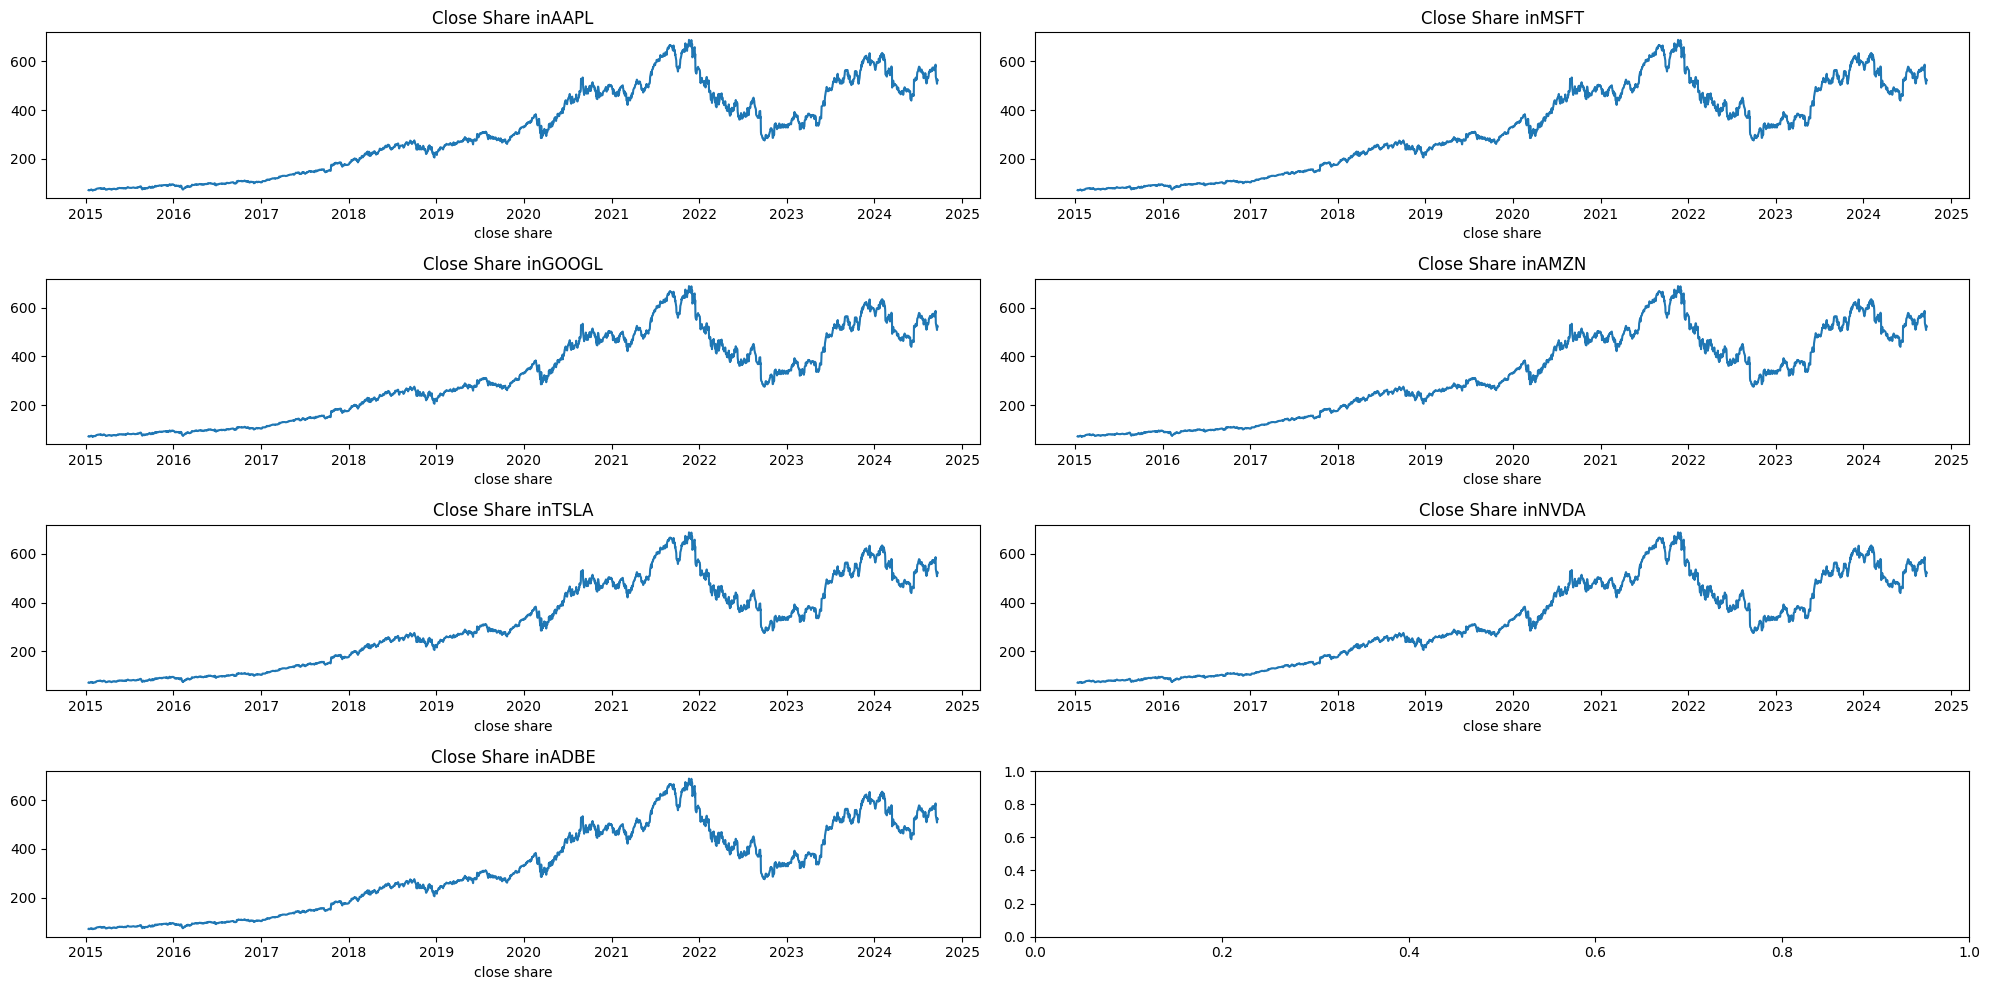

In [30]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(20,10))
axes=axes.flatten()
for i,j in enumerate(company_l,):
    
    axes[i].plot(company['Close'])
    axes[i].set_xlabel('close share')
    axes[i].set_ylabel(None)
    axes[i].set_title(f"Close Share in{ tickers[i]}")
plt.tight_layout()
plt.show()


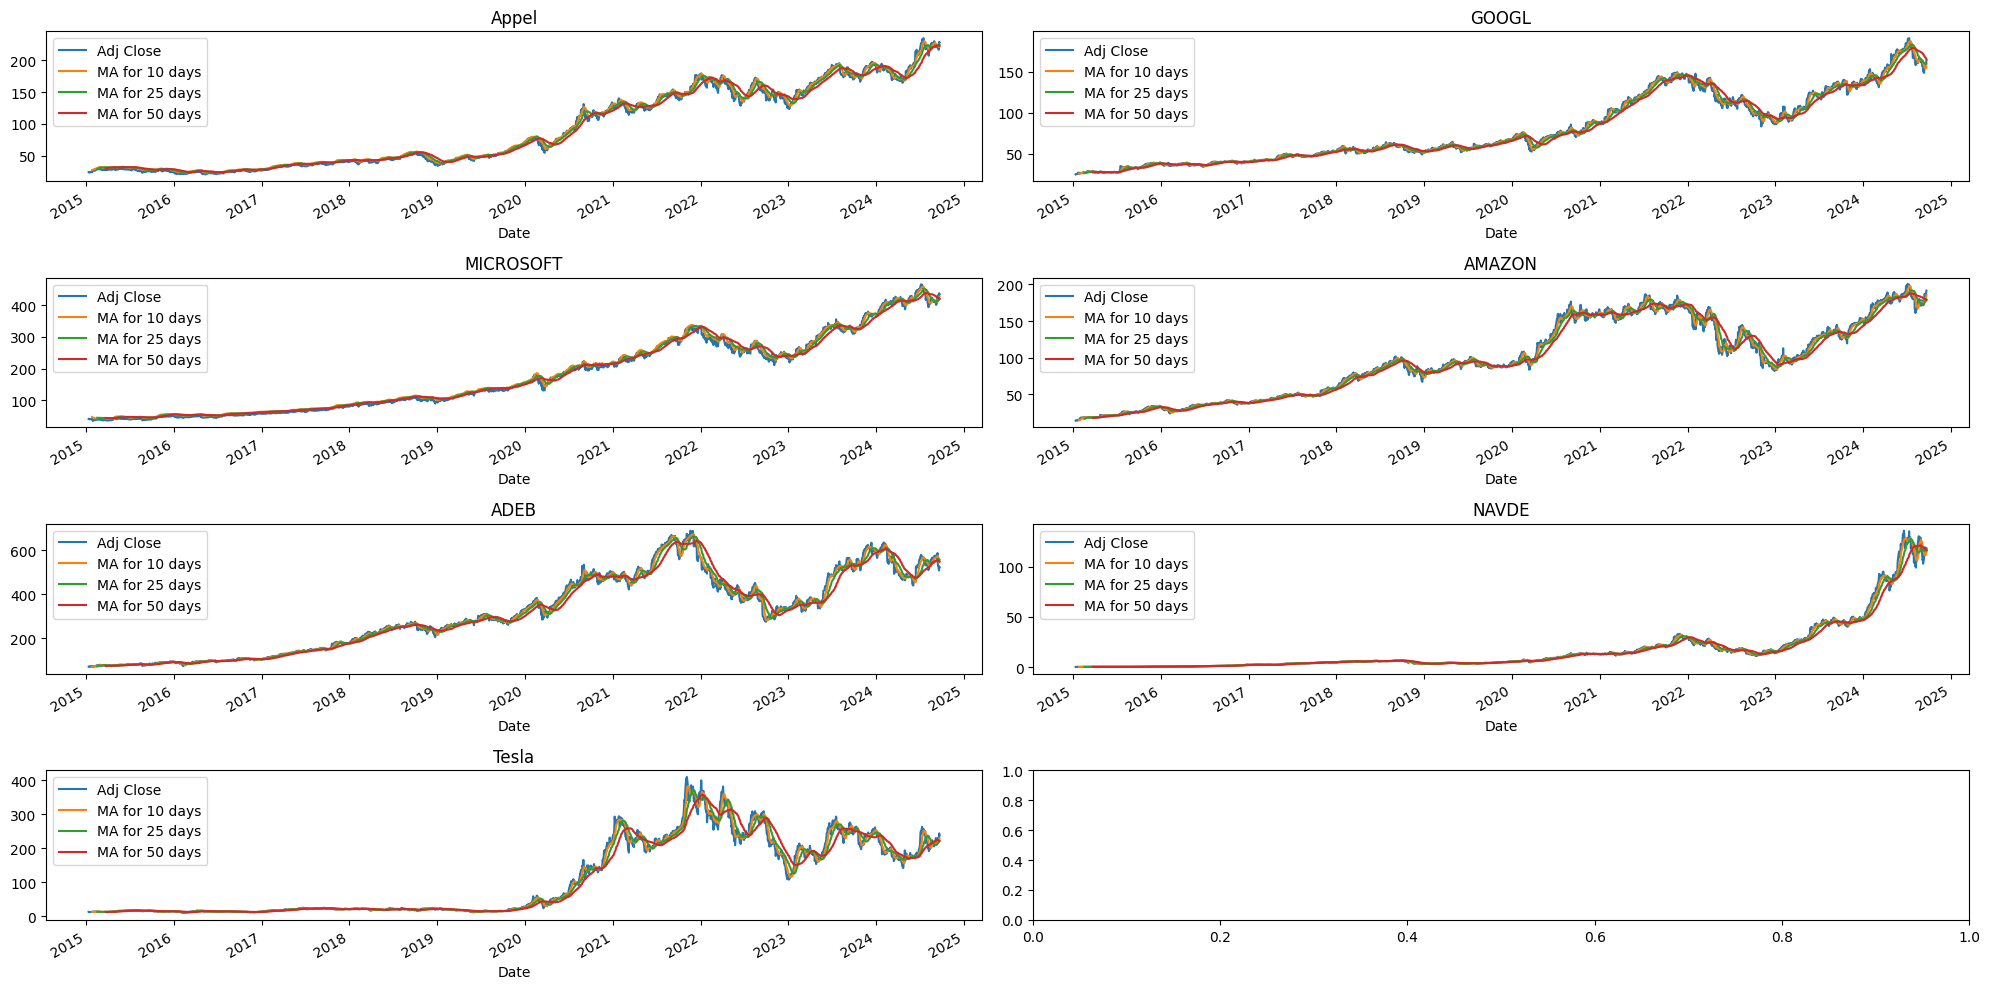

In [31]:
month_data=[10,25,50]
for i in month_data:
    for j in company_l:
        columns_name=f'MA for {i} days'
        j[columns_name]= j['Close'].rolling(i).mean()

fig,axes=plt.subplots(nrows=4, ncols=2, figsize=(20,10))

AAPL[['Adj Close','MA for 10 days','MA for 25 days','MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Appel')
GOOGL[['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGL')

# Plot for MSFT
MSFT[['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,0])

axes[1,0].set_title('MICROSOFT')

# Plot for AMZN
AMZN[['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')
# Plot for AMZN
ADBE[['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('ADEB')

# Plot for AMZN
NVDA[['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('NAVDE')

# Plot for AMZN
TSLA[['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Tesla')

fig.tight_layout()
plt.show()

In [32]:
tickers

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'ADBE']

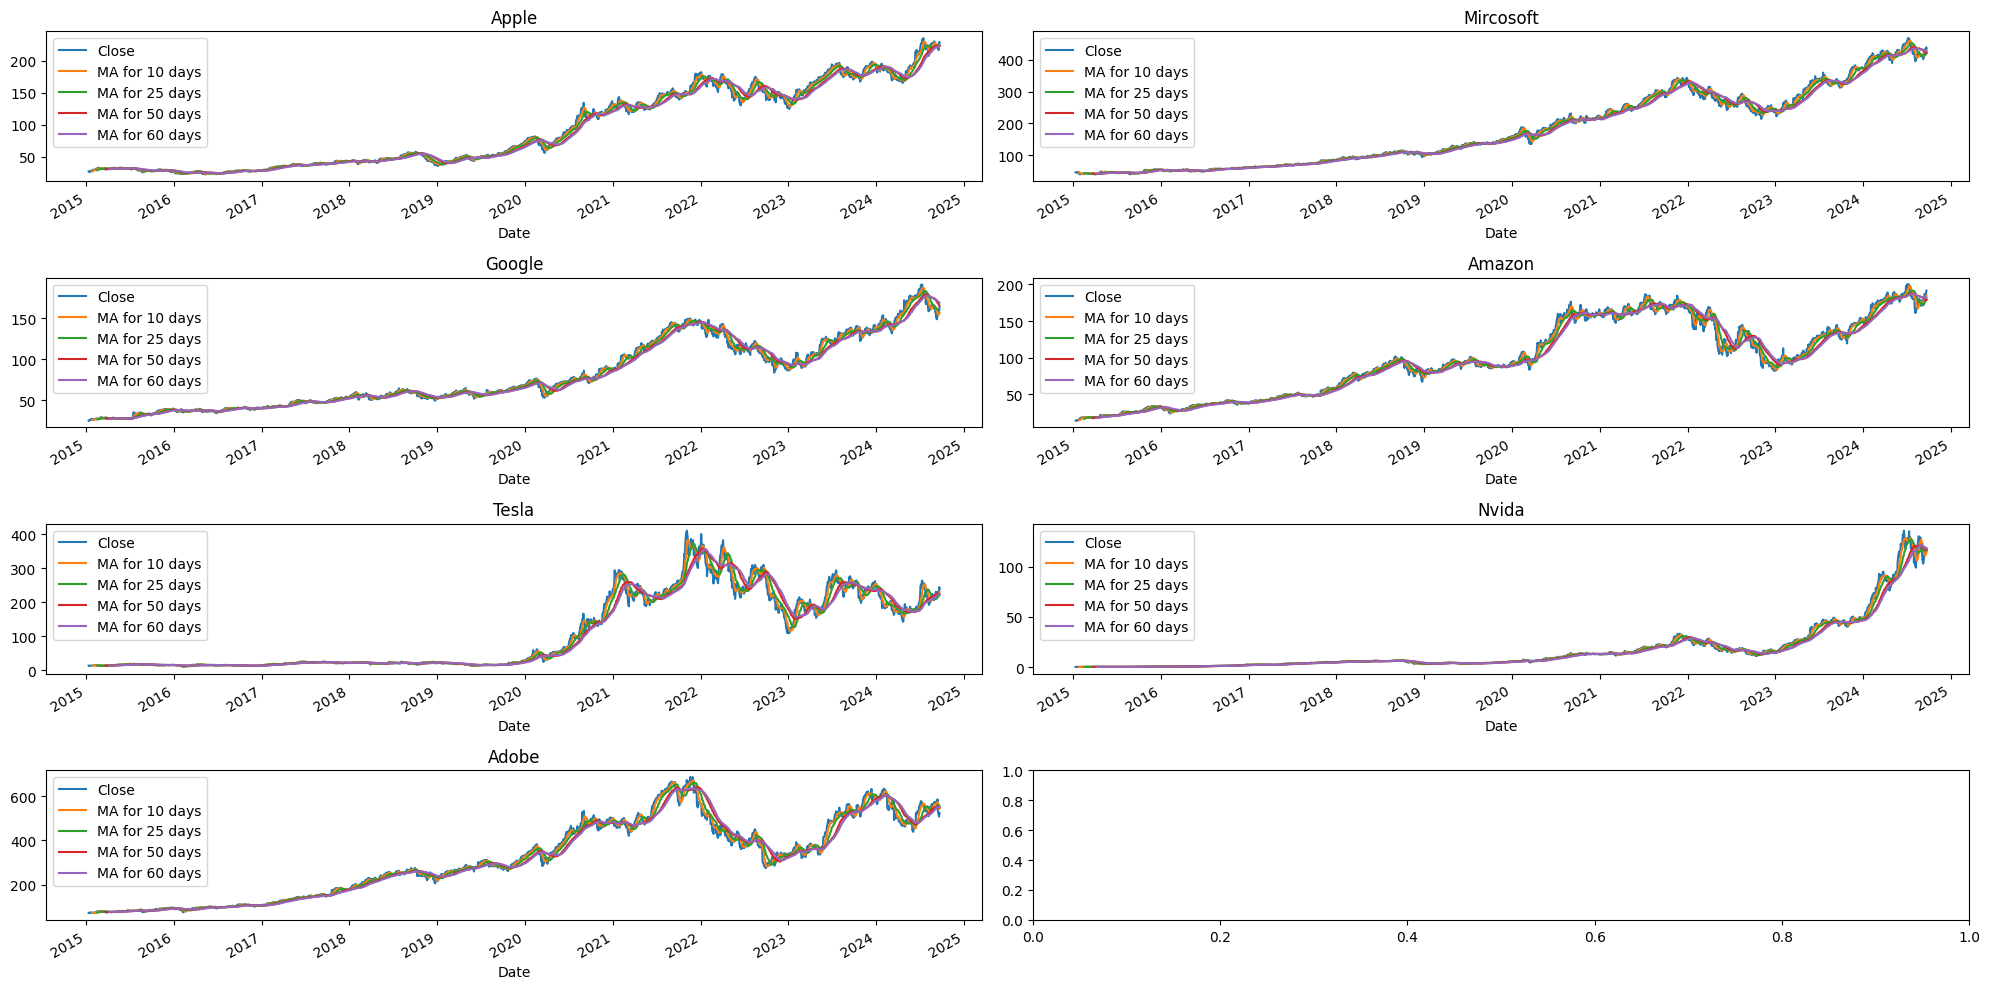

In [33]:

m_date=[10,25,50,60]


for i in m_date:
    for j in company_l:
        col=f'MA for {i} days'
        j[col]= j['Close'].rolling(i).mean()
fig,axes=plt.subplots(nrows=4,ncols=2, figsize=(20,10))

AAPL[['Close','MA for 10 days',"MA for 25 days","MA for 50 days",'MA for 60 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Apple')
MSFT[['Close','MA for 10 days',"MA for 25 days","MA for 50 days",'MA for 60 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Mircosoft')
GOOGL[['Close','MA for 10 days',"MA for 25 days","MA for 50 days",'MA for 60 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Google')

AMZN[['Close','MA for 10 days',"MA for 25 days","MA for 50 days",'MA for 60 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Amazon')
TSLA[['Close','MA for 10 days',"MA for 25 days","MA for 50 days",'MA for 60 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Tesla')
NVDA[['Close','MA for 10 days',"MA for 25 days","MA for 50 days",'MA for 60 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Nvida')
ADBE[['Close','MA for 10 days',"MA for 25 days","MA for 50 days",'MA for 60 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Adobe')

fig.tight_layout()
plt.show()



## what are the daily stock return of the stock average

Text(0.5, 1.0, 'Adobe')

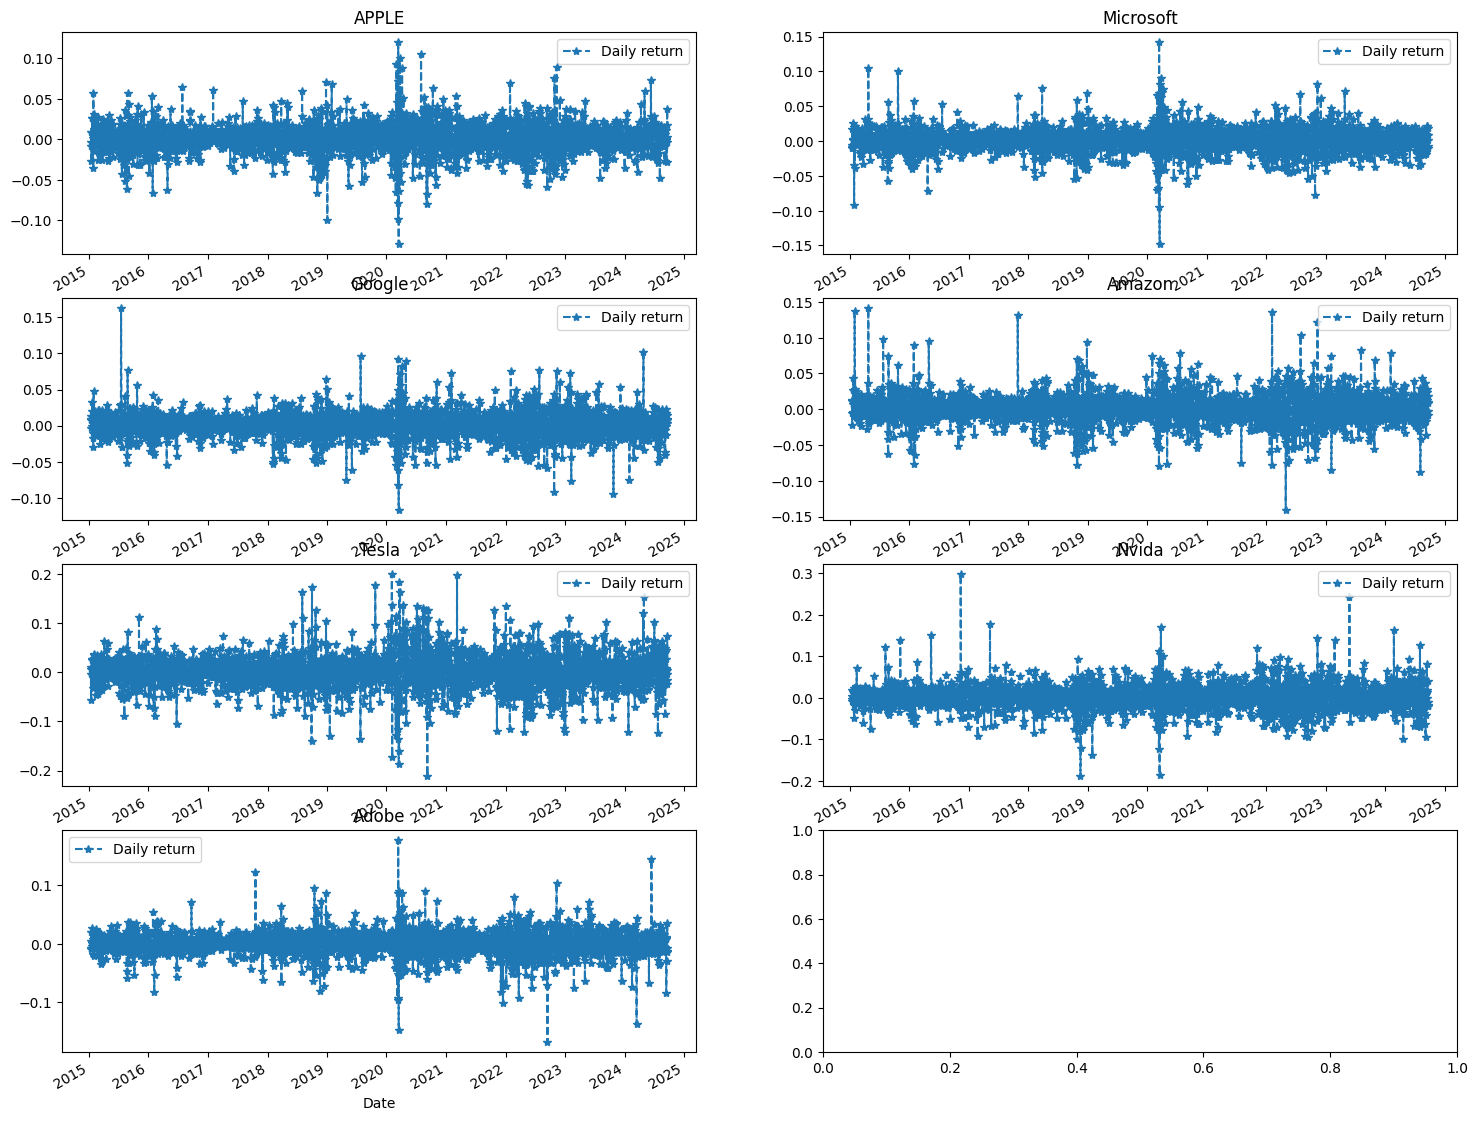

In [34]:
for company in company_l:
    company['Daily return']=company['Adj Close'].pct_change()
    
    
fig,axes=plt.subplots(nrows=4,ncols=2, figsize=(18,15))

AAPL['Daily return'].plot(ax=axes[0,0],legend=True,linestyle='--',marker="*")
axes[0,0].set_title('APPLE')
MSFT['Daily return'].plot(ax=axes[0,1],legend=True,linestyle='--',marker="*")
axes[0,1].set_title('Microsoft')
GOOGL['Daily return'].plot(ax=axes[1,0],legend=True,linestyle='--',marker="*")
axes[1,0].set_title('Google')
AMZN['Daily return'].plot(ax=axes[1,1],legend=True,linestyle='--',marker="*")
axes[1,1].set_title('Amazon')
TSLA['Daily return'].plot(ax=axes[2,0],legend=True,linestyle='--',marker="*")
axes[2,0].set_title('Tesla')
NVDA['Daily return'].plot(ax=axes[2,1],legend=True,linestyle='--',marker="*")
axes[2,1].set_title('Nvida')
ADBE['Daily return'].plot(ax=axes[3,0],legend=True,linestyle='--',marker="*")
axes[3,0].set_title('Adobe')

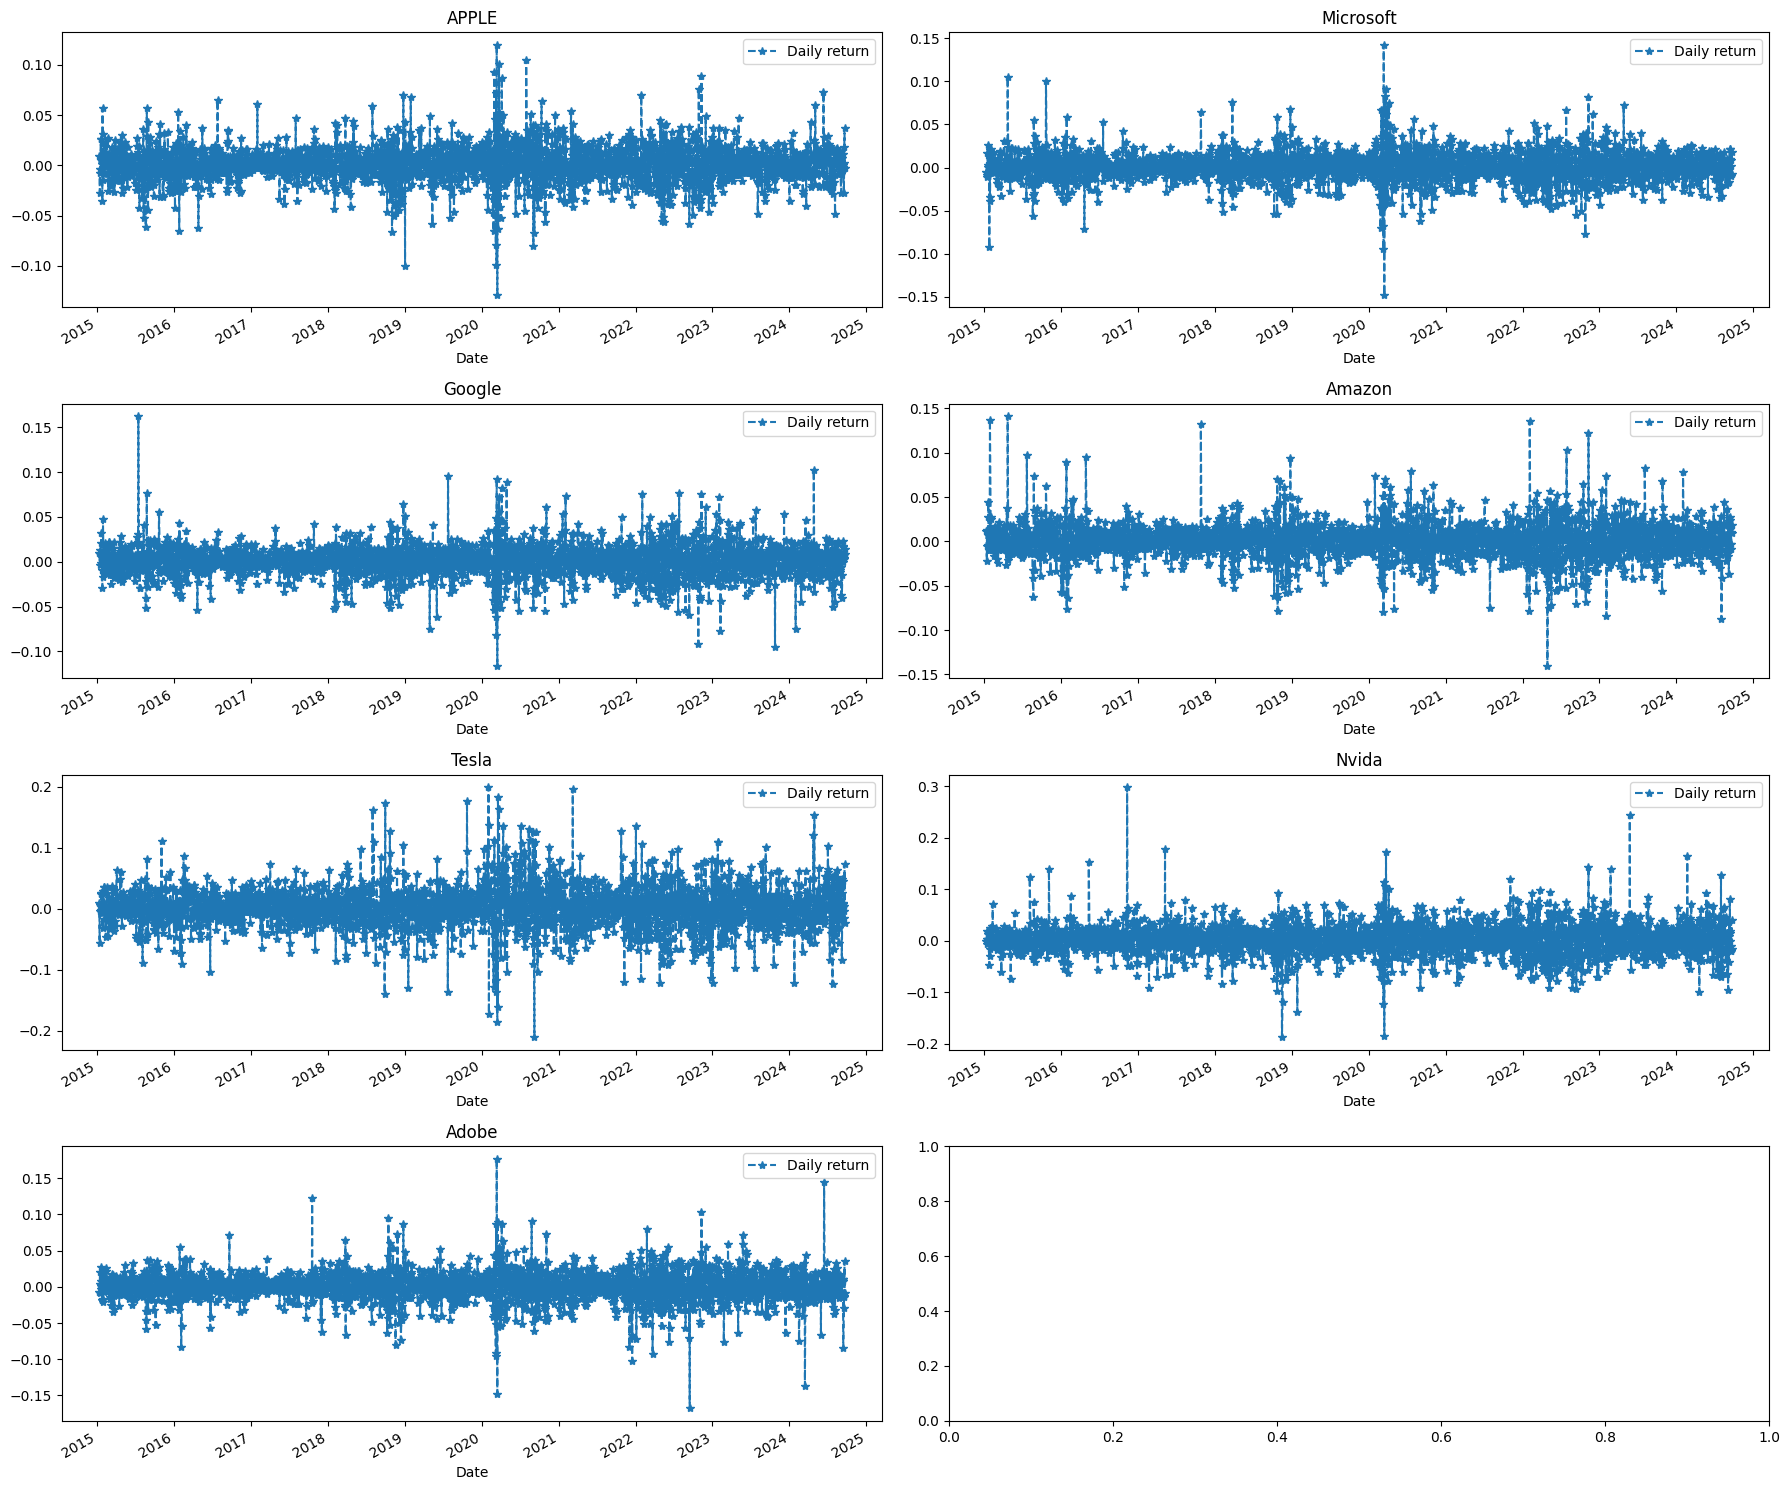

In [35]:
for company in company_l:
    company['Daily return']=company['Close'].pct_change()
    
    
fig,axes=plt.subplots(nrows=4,ncols=2, figsize=(18,15))

AAPL['Daily return'].plot(ax=axes[0,0],legend=True,linestyle='--',marker="*")
axes[0,0].set_title('APPLE')

MSFT['Daily return'].plot(ax=axes[0,1],legend=True,linestyle='--',marker="*")
axes[0,1].set_title('Microsoft')

GOOGL['Daily return'].plot(ax=axes[1,0],legend=True,linestyle='--',marker="*")
axes[1,0].set_title('Google')

AMZN['Daily return'].plot(ax=axes[1,1],legend=True,linestyle='--',marker="*")
axes[1,1].set_title('Amazon')

TSLA['Daily return'].plot(ax=axes[2,0],legend=True,linestyle='--',marker="*")
axes[2,0].set_title('Tesla')

NVDA['Daily return'].plot(ax=axes[2,1],legend=True,linestyle='--',marker="*")
axes[2,1].set_title('Nvida')

ADBE['Daily return'].plot(ax=axes[3,0],legend=True,linestyle='--',marker="*")
axes[3,0].set_title('Adobe')

fig.tight_layout()
plt.show()


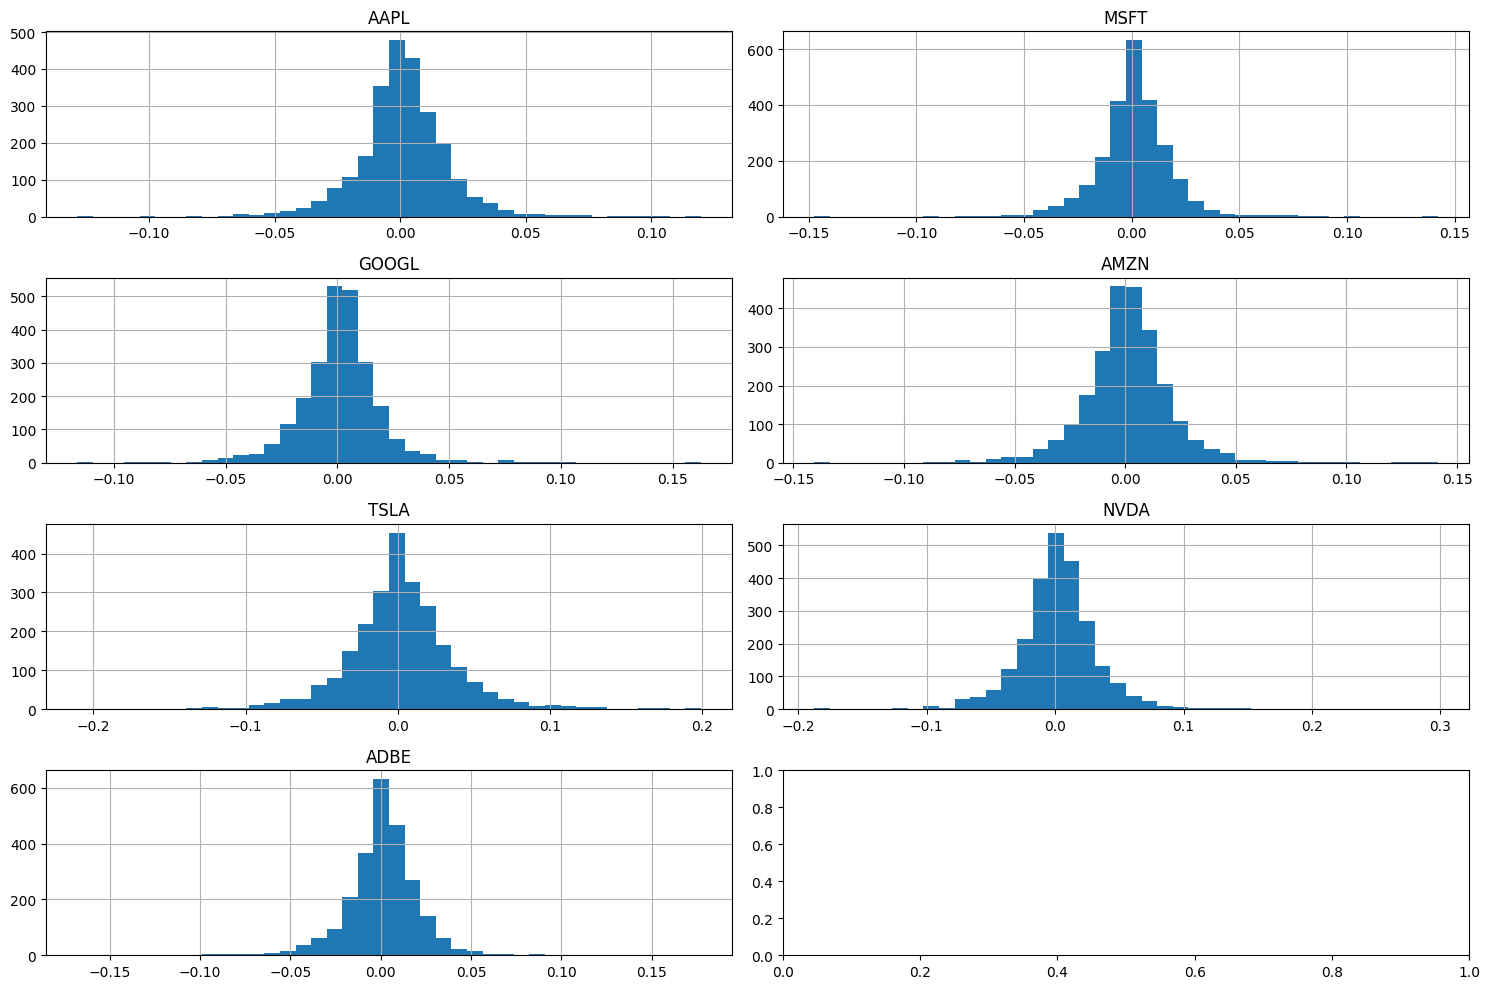

In [36]:
fig,axes=plt.subplots(nrows=4,ncols=2, figsize=(15,10))

axes=axes.flatten()

for i,j in enumerate(company_l):
    j['Daily return'].hist(bins=40,ax=axes[i])
    axes[i].set_title(f"{tickers[i]}")
    axes[i].set_label('Daily return')
    axes[i].set_label('Count')
fig.tight_layout()
plt.show()



## what are stock between correlation in difference  stock closing prices

In [37]:
company.max()

Open              696.280029
High              699.539978
Low               678.909973
Close             688.369995
Adj Close         688.369995
Volume              27840200
company                Adobe
MA for 10 days    672.751996
MA for 25 days    662.438796
MA for 50 days    641.695599
MA for 60 days    635.823334
Daily return        0.177193
dtype: object

In [38]:
clos_stock=yf.download(tickers,start=start_date,end=end_date)['Adj Close']

[*********************100%%**********************]  7 of 7 completed


In [39]:
clos_stock.head()

Ticker           AAPL       ADBE     AMZN      GOOGL       MSFT      NVDA  \
Date                                                                        
2015-01-12  24.356127  71.120003  14.5705  24.791613  40.095177  0.472616   
2015-01-13  24.572374  70.589996  14.7370  25.028027  39.888699  0.471895   
2015-01-14  24.478739  69.989998  14.6635  25.234016  39.544510  0.473816   
2015-01-15  23.814381  70.290001  14.3475  25.138254  39.131516  0.470455   
2015-01-16  23.629341  71.730003  14.5370  25.459957  39.785442  0.479096   

Ticker           TSLA  
Date                   
2015-01-12  13.480667  
2015-01-13  13.616667  
2015-01-14  12.846000  
2015-01-15  12.791333  
2015-01-16  12.871333

In [40]:
import seaborn as sns

In [41]:
cdf=clos_stock.pct_change()
cdf.head()

Ticker          AAPL      ADBE      AMZN     GOOGL      MSFT      NVDA  \
Date                                                                     
2015-01-12       NaN       NaN       NaN       NaN       NaN       NaN   
2015-01-13  0.008879 -0.007452  0.011427  0.009536 -0.005150 -0.001524   
2015-01-14 -0.003811 -0.008500 -0.004987  0.008230 -0.008629  0.004069   
2015-01-15 -0.027140  0.004286 -0.021550 -0.003795 -0.010444 -0.007092   
2015-01-16 -0.007770  0.020487  0.013208  0.012797  0.016711  0.018368   

Ticker          TSLA  
Date                  
2015-01-12       NaN  
2015-01-13  0.010088  
2015-01-14 -0.056597  
2015-01-15 -0.004256  
2015-01-16  0.006254

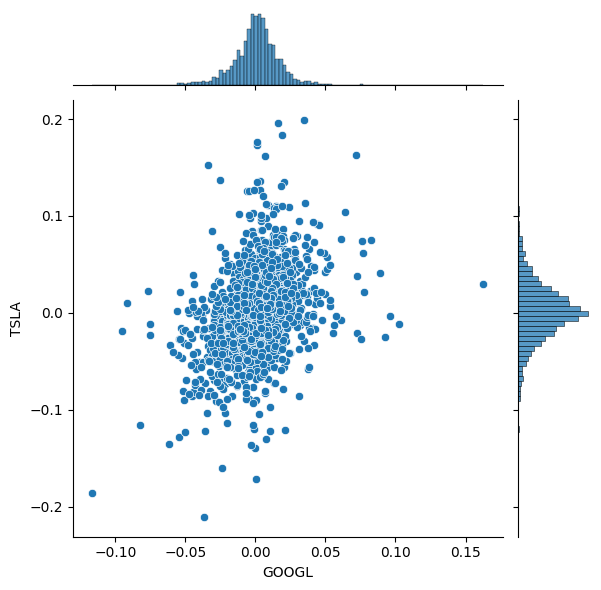

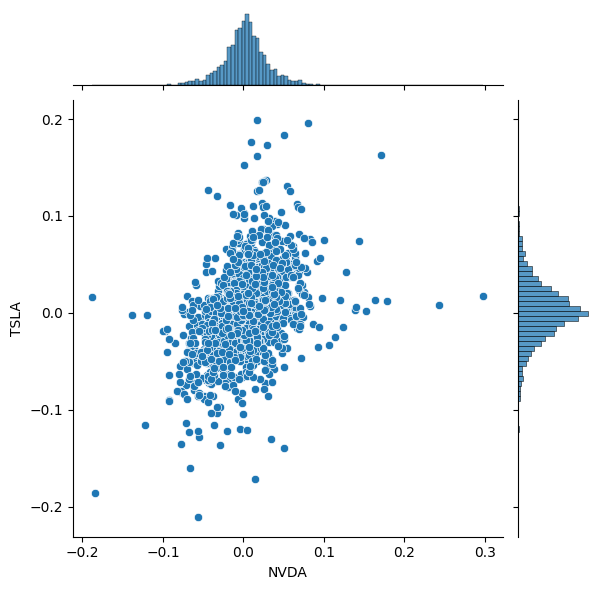

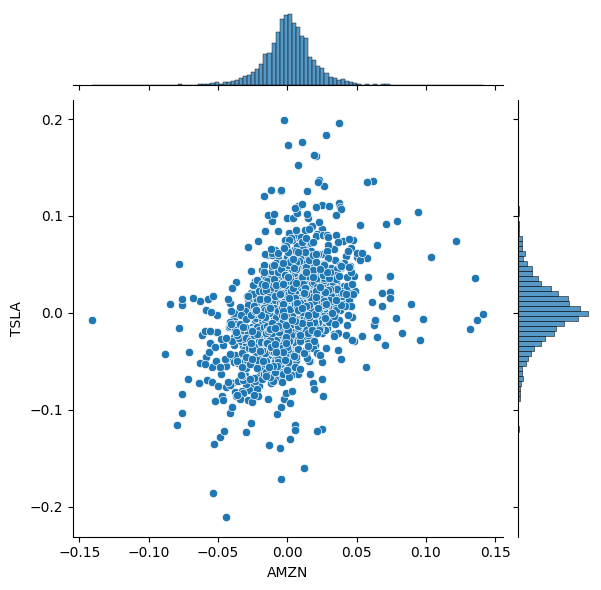

In [42]:
sns.jointplot(data=cdf,x=cdf['GOOGL'] ,y=cdf['TSLA'], kind='scatter')
sns.jointplot(data=cdf,x=cdf['NVDA'] ,y=cdf['TSLA'], kind='scatter')
sns.jointplot(data=cdf,x=cdf['AMZN'] ,y=cdf['TSLA'], kind='scatter')

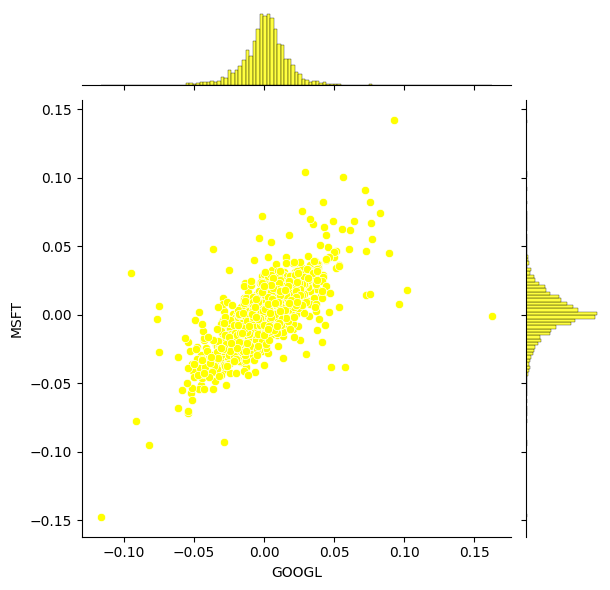

In [43]:
sns.jointplot(data=cdf,x=cdf['GOOGL'],y=cdf['MSFT'],kind='scatter',color='yellow')

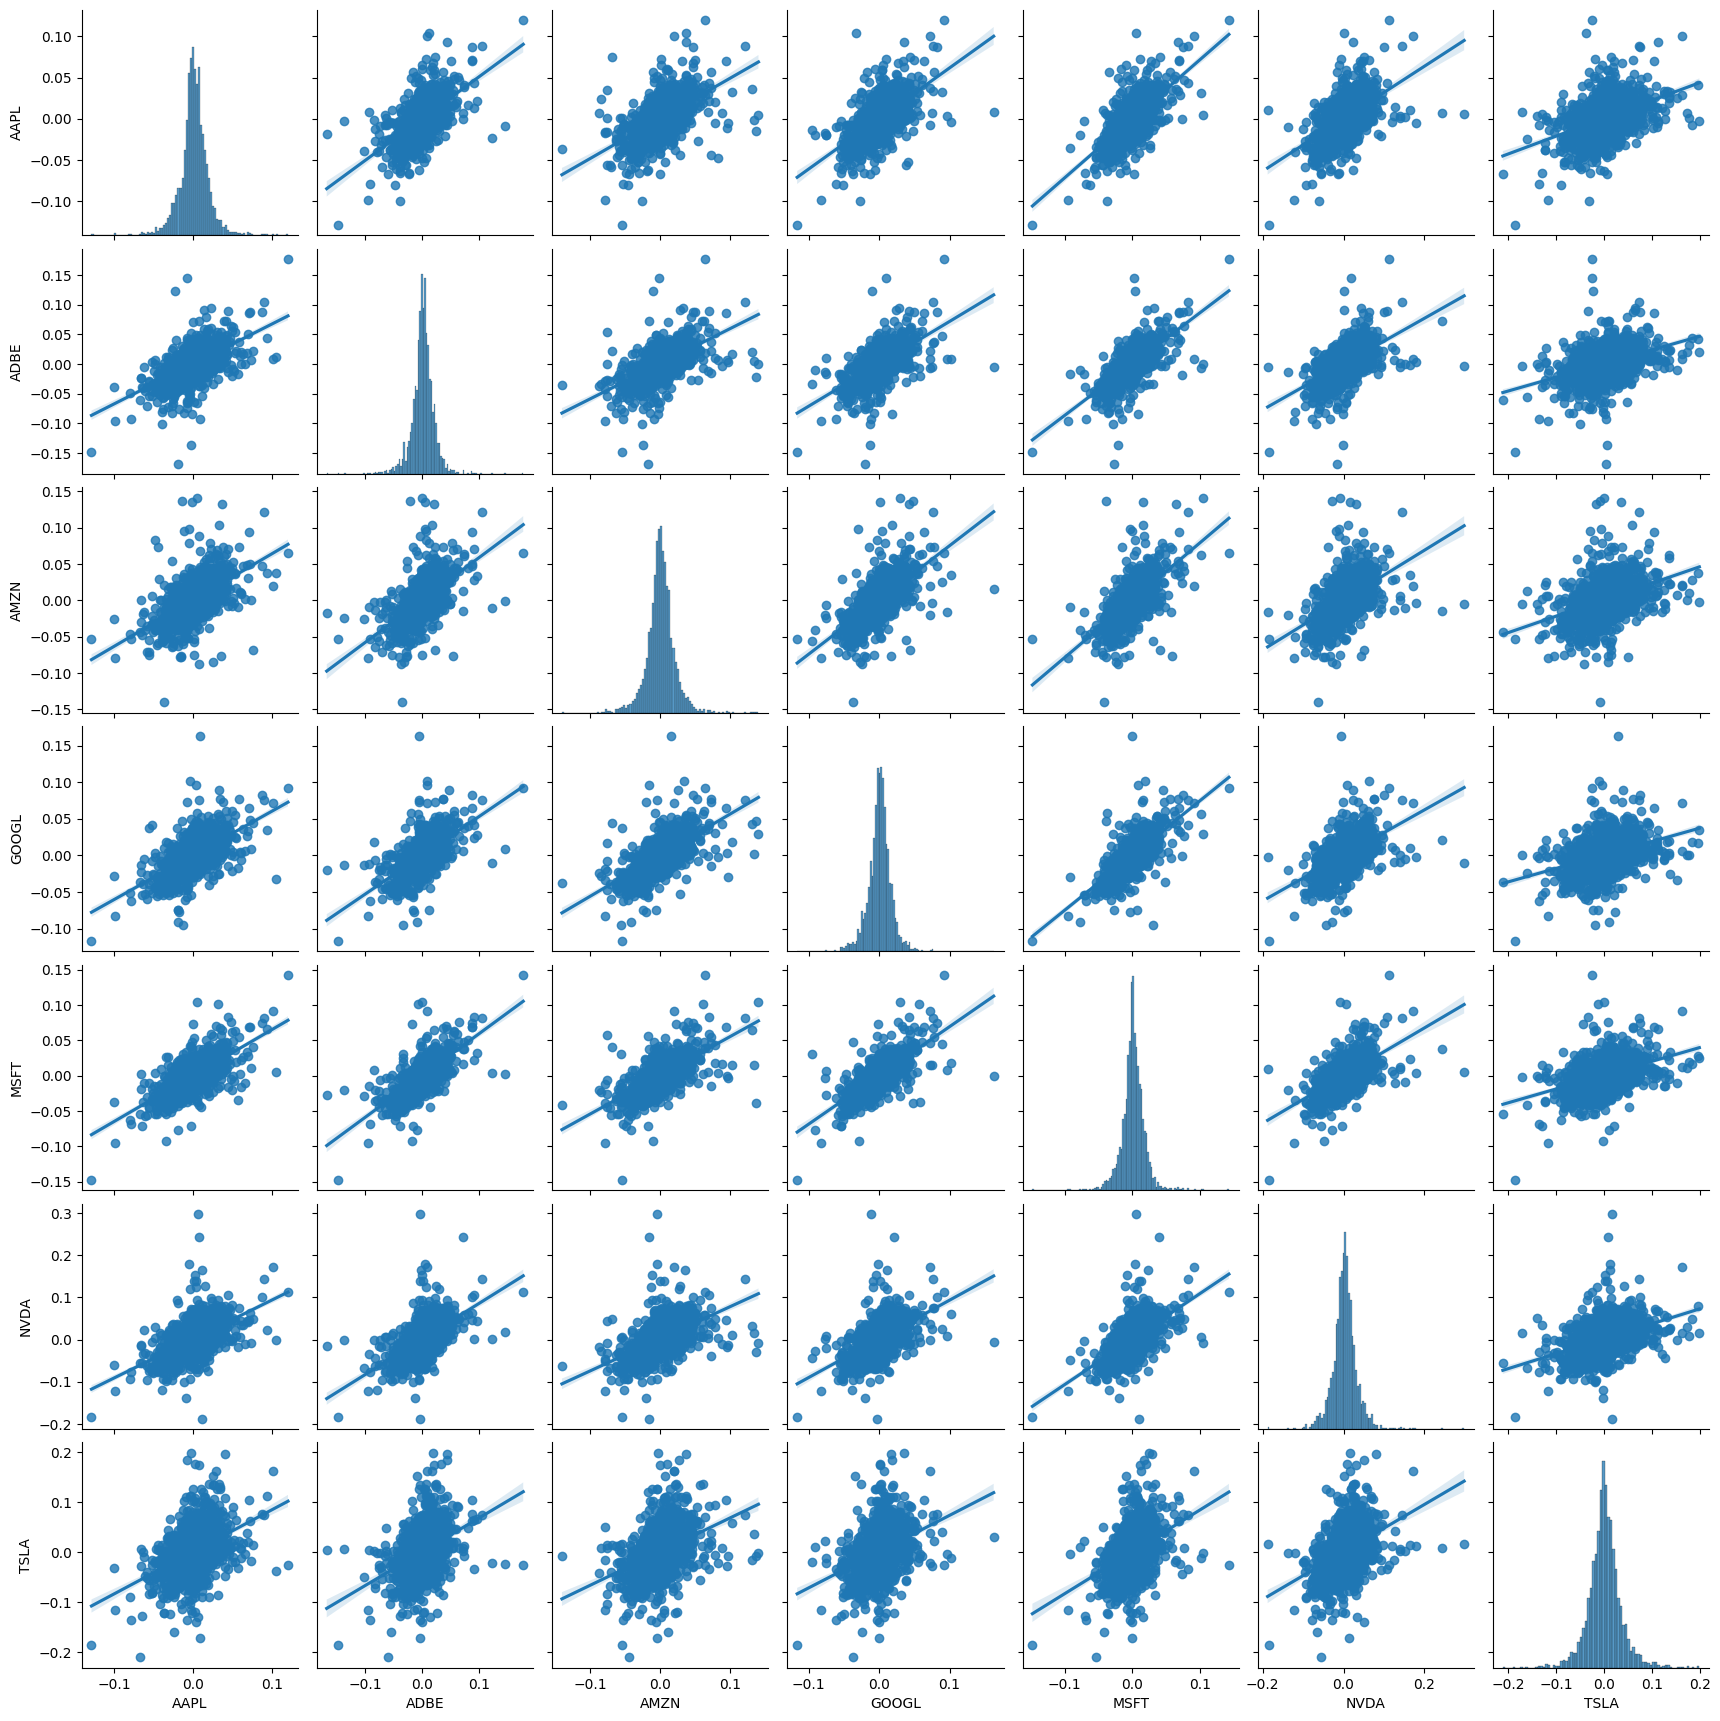

In [44]:
sns.pairplot(cdf,kind='reg')

In [45]:
cdf.isnull().sum()

Ticker
AAPL     1
ADBE     1
AMZN     1
GOOGL    1
MSFT     1
NVDA     1
TSLA     1
dtype: int64

In [46]:
cdf=cdf.dropna()

In [47]:
cdf.isnull().sum()

Ticker
AAPL     0
ADBE     0
AMZN     0
GOOGL    0
MSFT     0
NVDA     0
TSLA     0
dtype: int64

## this  understand which stock  high level and lowel level

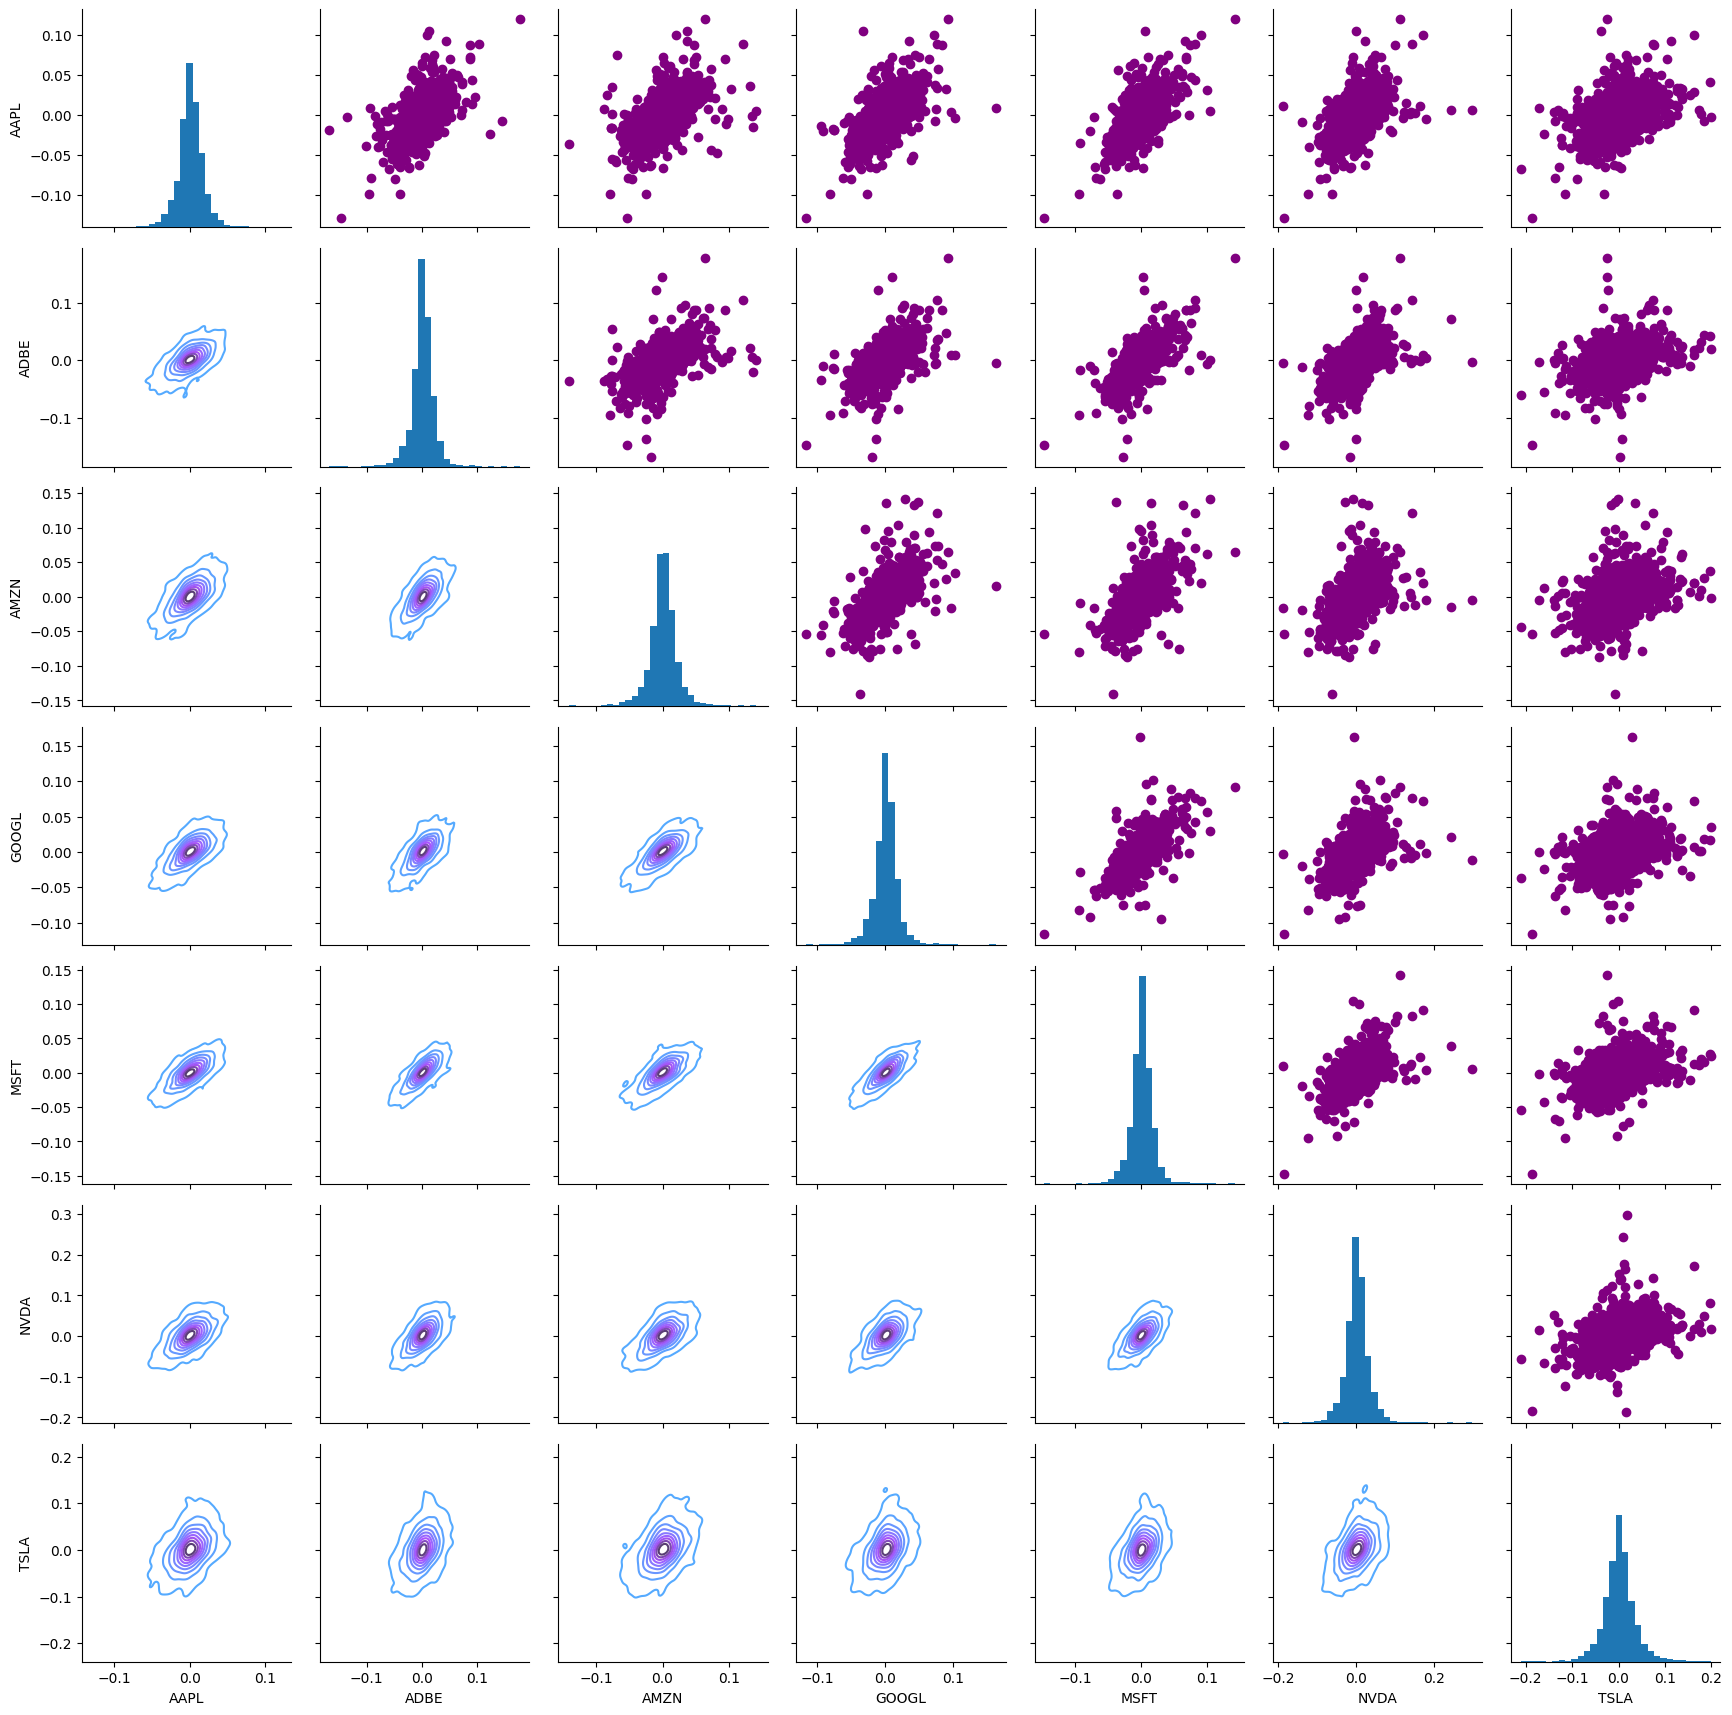

In [48]:
ved=sns.PairGrid(cdf)
ved.map_upper(plt.scatter,color='purple')
ved.map_lower(sns.kdeplot,cmap='cool_d')
ved.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation stock prices')

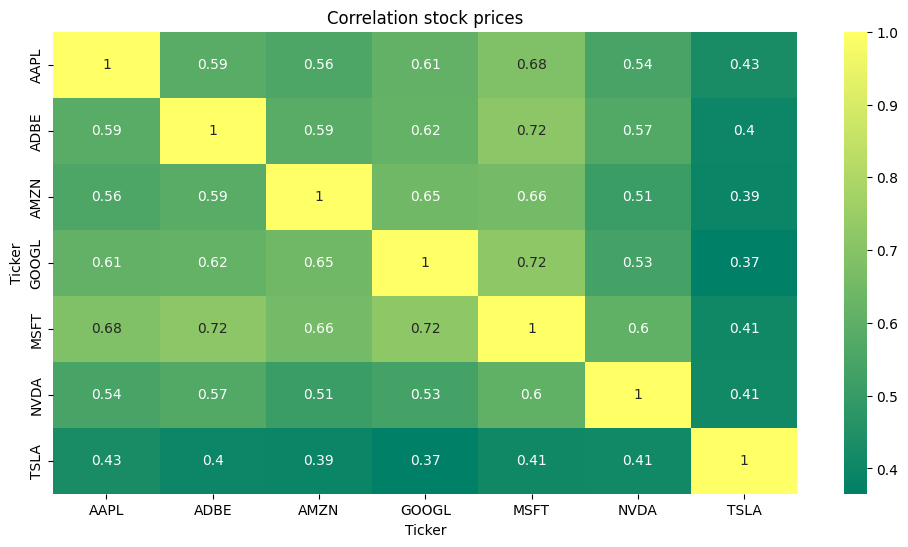

In [49]:
plt.figure(figsize=(12,6))

sns.heatmap(cdf.corr(),annot=True,cmap='summer')
plt.title('Correlation stock prices')

## How much value do we put at risk by investing in a particular stock?

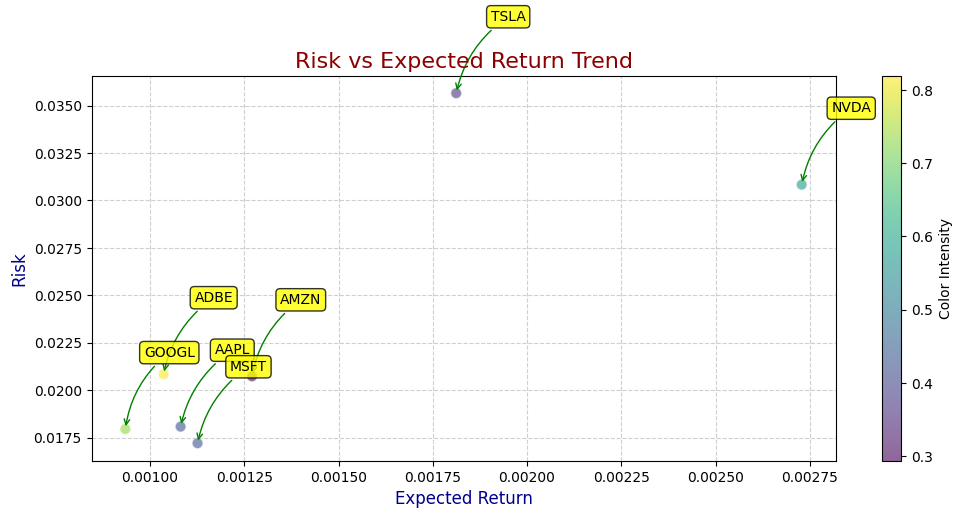

In [51]:


# Example trend updates: added different marker style, color gradient, and title.
result = cdf
area = np.pi * 20  # Marker area
colors = np.random.rand(len(result.columns))  # Random colors for each point

plt.figure(figsize=(12, 5))
plt.scatter(result.mean(), result.std(), s=area, c=colors, alpha=0.6, edgecolor='w', cmap='viridis')  # Trend: color gradient

# Labels and title with updated style
plt.xlabel('Expected Return', fontsize=12, color='darkblue')
plt.ylabel('Risk', fontsize=12, color='darkblue')
plt.title('Risk vs Expected Return Trend', fontsize=16, color='darkred')

# Annotating each point with new styling
for la, x, y in zip(result.columns, result.mean(), result.std()):
    plt.annotate(la, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='->', color='green', connectionstyle='arc3,rad=0.2'),  # Updated arrow style
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='yellow', alpha=0.8))  # Annotated with bounding box

plt.grid(True, linestyle='--', alpha=0.6)  # Adding gridlines for a more professional look
plt.colorbar(label='Color Intensity')

plt.show()


## ## this Three company very low Risk GOOGL and APPL MSFT 

In [52]:
data=yf.download("MSFT",start='2015-01-01',end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [53]:
data.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [54]:
data.duplicated().sum()

0

In [55]:
data.shape

(2446, 6)

In [56]:
data.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  46.660000  47.419998  46.540001  46.759998  40.232864  27913900
2015-01-05  46.369999  46.730000  46.250000  46.330002  39.862873  39673900
2015-01-06  46.380001  46.750000  45.540001  45.650002  39.277798  36447900
2015-01-07  45.980000  46.459999  45.490002  46.230000  39.776833  29114100
2015-01-08  46.750000  47.750000  46.720001  47.590000  40.946999  29645200

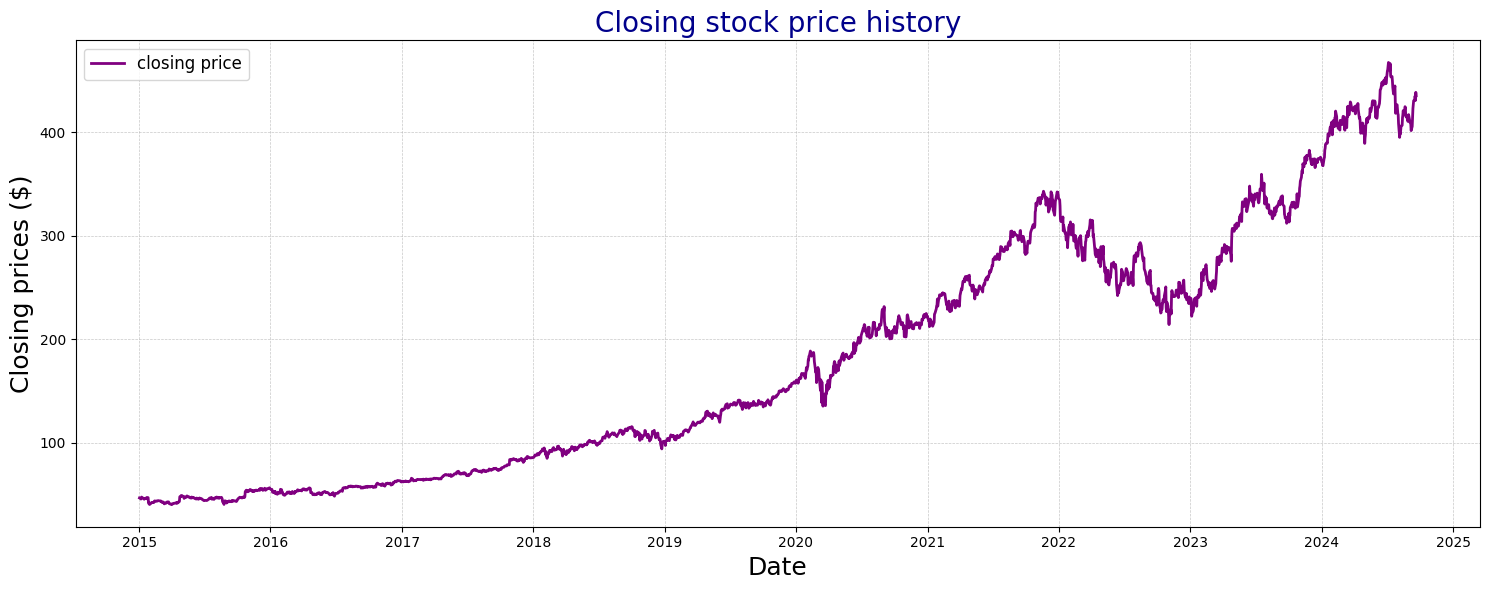

In [57]:
plt.figure(figsize=(15,6))
plt.title('Closing stock price history', fontsize=20, color='darkblue')
plt.plot(data['Close'],color='purple',linewidth=2,linestyle='-',label="closing price")
plt.xlabel('Date',fontsize=18,color='black')
plt.ylabel('Closing prices ($)',fontsize=18,color='black')

plt.legend(loc='upper left', fontsize=12)
plt.grid(True, which='both',linestyle='--',linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [58]:
stock=data['Close']

In [59]:
dataset=stock.values
dataset

array([ 46.75999832,  46.33000183,  45.65000153, ..., 430.80999756,
       438.69000244, 435.26998901])

In [60]:
#stock=stock.reset_index()
#df3=stock['Close']

In [61]:
df3=dataset.reshape(-1,1)

In [62]:
df3

array([[ 46.75999832],
       [ 46.33000183],
       [ 45.65000153],
       ...,
       [430.80999756],
       [438.69000244],
       [435.26998901]])

In [63]:
from sklearn.preprocessing import *


In [64]:
scaler=MinMaxScaler(feature_range=(0,1)) # data three diemension changes
sc=scaler.fit_transform(df3)
sc

array([[0.01514264],
       [0.01413626],
       [0.01254476],
       ...,
       [0.91398881],
       [0.93243149],
       [0.92442716]])

In [65]:
train_size=int(len(sc) * .80)
train_data=sc[:train_size]
test_date=sc[train_size:]

In [66]:
train_data.shape,test_date.shape

((1956, 1), (490, 1))

In [67]:
def diemension(data):
    timestamp=60
    x,y=[],[]
    for i in range(timestamp,len(data)):
        x.append(data[i-timestamp:i,0])
        y.append(data[i,0])
        
    x=np.array(x)
    y=np.array(y)
    
    
    return x ,y

In [68]:
x_train,y_train=diemension(train_data)

In [69]:
x_train= np.reshape(x_train , (x_train.shape[0], x_train.shape[1],1))

In [70]:
x_train.shape,y_train.shape

((1896, 60, 1), (1896,))

In [71]:
x_test,y_test=diemension(test_date)

In [72]:
x_test= np.reshape(x_test ,(x_test.shape[0],x_test.shape[1],1))

In [73]:
x_test.shape,y_test.shape

((430, 60, 1), (430,))

## LSTM model builde

In [74]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(64,activation='tanh',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error', metrics=['r2_score'])

c:\Users\pugazhenthi\.conda\envs\deep\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
hist=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0109 - r2_score: 0.7328 - val_loss: 5.8749e-04 - val_r2_score: 0.9711
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 8.4066e-04 - r2_score: 0.9802 - val_loss: 0.0020 - val_r2_score: 0.9021
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 8.1169e-04 - r2_score: 0.9809 - val_loss: 5.8399e-04 - val_r2_score: 0.9712
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 8.9971e-04 - r2_score: 0.9792 - val_loss: 0.0015 - val_r2_score: 0.9271
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 6.2611e-04 - r2_score: 0.9854 - val_loss: 0.0029 - val_r2_score: 0.8553
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.8794e-04 - r2_score: 0.9883 - val_loss: 0.0017 - val_r2_score: 0.9175
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.4316e-04 - r2_score: 0.9874 - val_loss: 5.1498e-04 - val_r2_score: 0.9746
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 5.6386e-04 - r2_

In [77]:
m1=model.evaluate(x_train,y_train)
m2=model.evaluate(x_test,y_test)
print(m1)
print(m2)

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.9856e-05 - r2_score: 0.9461
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.8675e-04 - r2_score: 0.8907
[0.0001392292615491897, 0.9967181086540222]
[0.0009245735127478838, 0.9544679522514343]


In [78]:
model.metrics_names

['loss', 'compile_metrics']

In [79]:
train_score=model.evaluate(x_train,y_train,verbose=1)
for i,m in enumerate(model.metrics_names):
    print('Train{0}: {1:5.4f}'.format(m,train_score[i]))
    
test_score=model.evaluate(x_test,y_test,verbose=1)
for i,m in enumerate(model.metrics_names):
    print('Test{0}: {1:5.4f}'.format(m,test_score[i]))

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 3.9856e-05 - r2_score: 0.9461
Trainloss: 0.0001
Traincompile_metrics: 0.9967
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 6.8675e-04 - r2_score: 0.8907
Testloss: 0.0009
Testcompile_metrics: 0.9545


In [80]:
predicted=model.predict(x_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


In [81]:
predicted=scaler.inverse_transform(predicted)
predicted.shape

(430, 1)

In [82]:
train=data[:train_size]
train



Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02   46.660000   47.419998   46.540001   46.759998   40.232864   
2015-01-05   46.369999   46.730000   46.250000   46.330002   39.862873   
2015-01-06   46.380001   46.750000   45.540001   45.650002   39.277798   
2015-01-07   45.980000   46.459999   45.490002   46.230000   39.776833   
2015-01-08   46.750000   47.750000   46.720001   47.590000   40.946999   
...                ...         ...         ...         ...         ...   
2022-10-03  235.410004  241.610001  234.660004  240.740005  236.660141   
2022-10-04  245.089996  250.360001  244.979996  248.880005  244.662186   
2022-10-05  245.990005  250.580002  244.100006  249.199997  244.976746   
2022-10-06  247.929993  250.339996  246.080002  246.789993  242.607590   
2022-10-07  240.899994  241.320007  233.169998  234.240005  230.270309   

              Volume  
Date                  
2015-01-02  27913900  
2015-01-05  39673900  
2015-01-06  36447900  
2015-01-07  29114100  
2015-01-08  29645200  
...              ...  
2022-10-03  28880400  
2022-10-04  34888400  
2022-10-05  20347100  
2022-10-06  20239900  
2022-10-07  37769600  

[1956 rows x 6 columns]

In [83]:
valid=data[train_size :]

In [84]:
predicted.shape

(430, 1)

In [85]:
valid

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-10  233.050003  234.559998  226.729996  229.250000  225.364853   
2022-10-11  227.619995  229.059998  224.110001  225.410004  221.589935   
2022-10-12  225.399994  227.860001  223.960007  225.750000  221.924164   
2022-10-13  219.850006  236.100006  219.130005  234.240005  230.270309   
2022-10-14  235.539993  237.240005  228.339996  228.559998  224.686554   
...                ...         ...         ...         ...         ...   
2024-09-16  430.600006  433.529999  428.220001  431.339996  431.339996   
2024-09-17  440.230011  441.850006  432.269989  435.149994  435.149994   
2024-09-18  435.000000  436.029999  430.410004  430.809998  430.809998   
2024-09-19  441.230011  441.500000  436.899994  438.690002  438.690002   
2024-09-20  437.220001  439.239990  434.220001  435.269989  435.269989   

              Volume  
Date                  
2022-10-10  29743600  
2022-10-11  30474000  
2022-10-12  21903900  
2022-10-13  42551800  
2022-10-14  30198600  
...              ...  
2024-09-16  13834700  
2024-09-17  18874200  
2024-09-18  18898000  
2024-09-19  21706600  
2024-09-20  55155300  

[490 rows x 6 columns]

In [86]:

valid = valid.iloc[:len(predicted)] 
valid['prediction'] = predicted


C:\Users\pugazhenthi\AppData\Local\Temp\ipykernel_27084\173985490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = predicted


In [87]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 430 entries, 2022-10-10 to 2024-06-26
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        430 non-null    float64
 1   High        430 non-null    float64
 2   Low         430 non-null    float64
 3   Close       430 non-null    float64
 4   Adj Close   430 non-null    float64
 5   Volume      430 non-null    int64  
 6   prediction  430 non-null    float32
dtypes: float32(1), float64(5), int64(1)
memory usage: 25.2 KB


In [88]:
valid['difference']=valid['Close'] - valid['prediction']

C:\Users\pugazhenthi\AppData\Local\Temp\ipykernel_27084\2626527235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['difference']=valid['Close'] - valid['prediction']


In [89]:
valid.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-10  233.050003  234.559998  226.729996  229.250000  225.364853   
2022-10-11  227.619995  229.059998  224.110001  225.410004  221.589935   
2022-10-12  225.399994  227.860001  223.960007  225.750000  221.924164   
2022-10-13  219.850006  236.100006  219.130005  234.240005  230.270309   
2022-10-14  235.539993  237.240005  228.339996  228.559998  224.686554   

              Volume  prediction  difference  
Date                                          
2022-10-10  29743600  234.803482   -5.553482  
2022-10-11  30474000  232.550720   -7.140717  
2022-10-12  21903900  230.162292   -4.412292  
2022-10-13  42551800  228.203979    6.036026  
2022-10-14  30198600  226.904999    1.654999

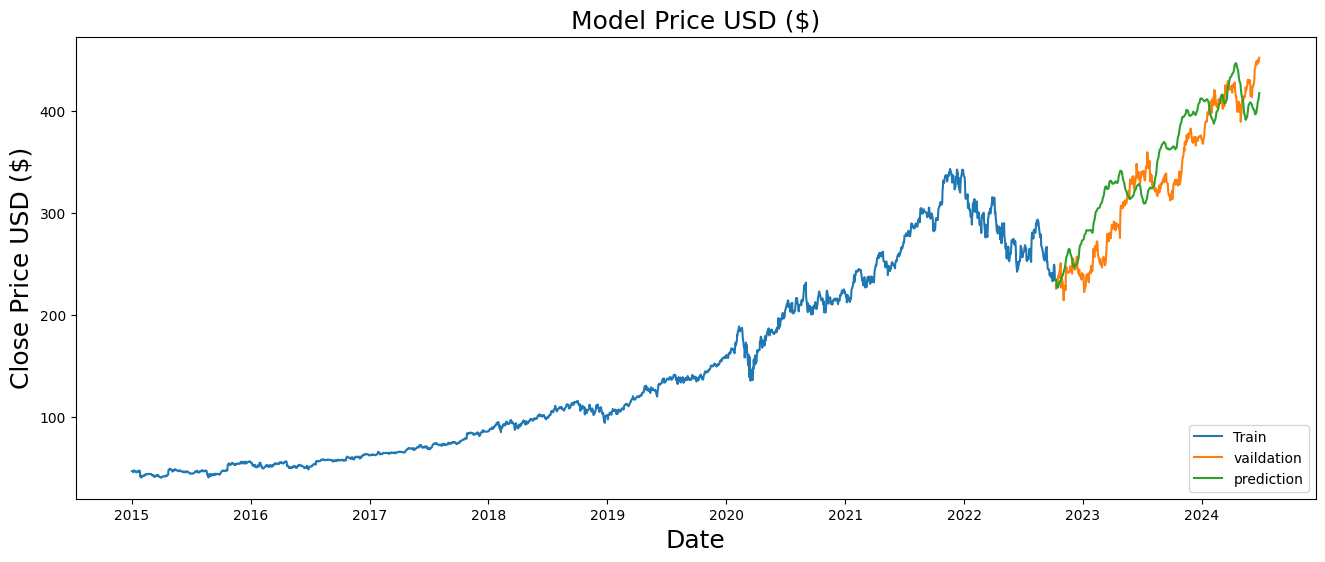

In [90]:
plt.figure(figsize=(16,6))
plt.title('Model Price USD ($)', fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'],label='Train')
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','vaildation','prediction'], loc="lower right")

plt.show()

In [91]:
test_date.size

490

In [92]:
model.save('stock_clos.h5')